# Facial Expression Classifier

- Mount drive

- Copy src directory from drive into current directory

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp drive/MyDrive/FacialExpressionClassification/src -r .

#### Dependencies

In [3]:
!pip install kaggle
!pip install ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54.5 MB 241 kB/s 
     |████████████████████████████████| 4.1 MB 44.3 MB/s 
     |████████████████████████████████| 10.1 MB 40.7 MB/s 
     |████████████████████████████████| 144 kB 64.1 MB/s 
     |████████████████████████████████| 466 kB 66.9 MB/s 
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.47.0
    Uninstalling grpcio-1.47.0:
      Successfully uninstalled grpcio-1.47.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import torch
import torchvision         

import shutil
import os
import PIL
import copy
from sklearn.metrics import confusion_matrix

In [5]:
from src.data import make_dataset, load_dataset
from src.models import models, train_model, predict_model
from src.visualization import visualize
from src import helpers

#### Downloading and preparing data

Download dataset from Kaggle

In [6]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

! unzip challenges-in-representation-learning-facial-expression-recognition-challenge.zip

 99% 282M/285M [00:02<00:00, 120MB/s]
100% 285M/285M [00:02<00:00, 121MB/s]
Archive:  challenges-in-representation-learning-facial-expression-recognition-challenge.zip
  inflating: example_submission.csv  
  inflating: fer2013.tar.gz          
  inflating: icml_face_data.csv      
  inflating: test.csv                
  inflating: train.csv               


- Load dataset

- Display pandas df of data

- Display plot of labeled images for each emotion

   emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...



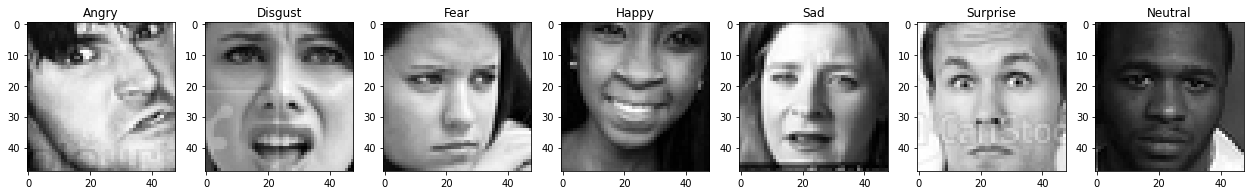

In [ ]:
make_dataset.display_images()

- Create folders for data
- Filter dataset into training, validation, and testing data
- Convert given pixel values to PIL images
- Save PIL images to folders corresponding to each image label

In [37]:
make_dataset.prepare_data()

- Find normalization constants for training data
- Load images, apply transformations, convert to tensors, and normalize
- Define DataLoaders for training, validation, and testing data

In [38]:
data_loaders, validationTestDataTransforms = load_dataset.get_data_loaders()

## Model Architecture

Two model architectures are used

1) Custom CNN

2) Pretrained ResNet-50 

## Training

Train custom model for 20 epochs

In [ ]:
custom_model, _, _, _, _ = train_model.train_model(
    [], data_loaders, "custom", 20
)


Epoch 1
-------
Train
Loss: 1.8234   Acc: 24.3129
Validation
Loss: 1.7848   Acc: 24.9373


Epoch 2
-------
Train
Loss: 1.7869   Acc: 25.6749
Validation
Loss: 1.7162   Acc: 30.4263


Epoch 3
-------
Train
Loss: 1.7359   Acc: 28.7819
Validation
Loss: 1.6337   Acc: 32.4324


Epoch 4
-------
Train
Loss: 1.7083   Acc: 29.8791
Validation
Loss: 1.5705   Acc: 34.2992


Epoch 5
-------
Train
Loss: 1.6506   Acc: 32.8712
Validation
Loss: 1.5090   Acc: 39.8440


Epoch 6
-------
Train
Loss: 1.6006   Acc: 35.0482
Validation
Loss: 1.4011   Acc: 44.9150


Epoch 7
-------
Train
Loss: 1.5606   Acc: 37.9219
Validation
Loss: 1.3677   Acc: 46.9769


Epoch 8
-------
Train
Loss: 1.5357   Acc: 39.4371
Validation
Loss: 1.3455   Acc: 47.0326


Epoch 9
-------
Train
Loss: 1.5041   Acc: 41.2484
Validation
Loss: 1.3369   Acc: 47.9242


Epoch 10
-------
Train
Loss: 1.4884   Acc: 41.3703
Validation
Loss: 1.2993   Acc: 48.5651


Epoch 11
-------
Train
Loss: 1.4760   Acc: 42.8890
Validation
Loss: 1.2970   Acc: 49.3452

Custom model reaches validation accuracy of ~52%.

Hyperparameter Tuning

In [9]:
tuned_hyperparameters, best_loss, best_accuracy = train_model.run_hyperparameter_search(data_loaders, "pretrained", 30)

2022-07-25 23:02:03,599	WARNING function_runner.py:604 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
2022-07-25 23:02:03,660	INFO logger.py:630 -- pip install "ray[tune]" to see TensorBoard files.
2022-07-25 23:02:03,662	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-25 23:02:03 (running for 00:00:00.24)
Memory usage on this node: 1.5/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: None | Iter 3.000: None
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 16/20 (15 PENDING, 1 RUNNING)
+-------------------------+----------+----------------+------+------+-------------+
| Trial name              | status   | loc            |   l1 |   l2 |          lr |
|-------------------------+----------+----------------+------+------+-------------|
| train_model_cc481_00000 | RUNNING  | 172.28.0.2:576 |  128 |   64 | 0.0843416   |
| train_model_cc481_00001 | PENDING  |                |   64 |  128 | 0.00556951  |
| train_model_cc481_00002 | PENDING  |                |   64 |  256 | 0.00200901  |
| train_model_cc481_00003 | PENDING  |                |

(train_model pid=576) Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
  0%|          | 0.00/97.8M [00:00<?, ?B/s]
  1%|          | 848k/97.8M [00:00<00:11, 8.66MB/s]
  2%|▏         | 2.33M/97.8M [00:00<00:07, 12.8MB/s]
  5%|▌         | 5.02M/97.8M [00:00<00:04, 19.8MB/s]
 10%|█         | 9.80M/97.8M [00:00<00:02, 31.7MB/s]
 19%|█▉        | 18.6M/97.8M [00:00<00:01, 53.6MB/s]
 36%|███▌      | 35.0M/97.8M [00:00<00:00, 93.7MB/s]
 61%|██████▏   | 60.1M/97.8M [00:00<00:00, 149MB/s] 
100%|██████████| 97.8M/97.8M [00:00<00:00, 122MB/s]


== Status ==
Current time: 2022-07-25 23:02:11 (running for 00:00:07.45)
Memory usage on this node: 2.3/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: None | Iter 3.000: None
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 17/20 (16 PENDING, 1 RUNNING)
+-------------------------+----------+----------------+------+------+-------------+
| Trial name              | status   | loc            |   l1 |   l2 |          lr |
|-------------------------+----------+----------------+------+------+-------------|
| train_model_cc481_00000 | RUNNING  | 172.28.0.2:576 |  128 |   64 | 0.0843416   |
| train_model_cc481_00001 | PENDING  |                |   64 |  128 | 0.00556951  |
| train_model_cc481_00002 | PENDING  |                |   64 |  256 | 0.00200901  |
| train_model_cc481_00003 | PENDING  |                |

2022-07-25 23:02:53,417	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00000:
  accuracy: 44.74784469604492
  date: 2022-07-25_23-02-53
  done: false
  experiment_id: d7f4b9508cad47fb892ae371cda21b2e
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.4288874281651796
  node_ip: 172.28.0.2
  pid: 576
  should_checkpoint: true
  time_since_restore: 47.29386830329895
  time_this_iter_s: 47.29386830329895
  time_total_s: 47.29386830329895
  timestamp: 1658790173
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00000
  warmup_time: 0.003275156021118164
  
(train_model pid=576) 
(train_model pid=576) 
(train_model pid=576) Epoch 2
(train_model pid=576) -------
== Status ==
Current time: 2022-07-25 23:02:58 (running for 00:00:54.78)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: None | Iter 3.000: None
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outpu

2022-07-25 23:03:29,507	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00000:
  accuracy: 49.42881393432617
  date: 2022-07-25_23-03-29
  done: false
  experiment_id: d7f4b9508cad47fb892ae371cda21b2e
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.3454768419199317
  node_ip: 172.28.0.2
  pid: 576
  should_checkpoint: true
  time_since_restore: 83.36119413375854
  time_this_iter_s: 36.067325830459595
  time_total_s: 83.36119413375854
  timestamp: 1658790209
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00000
  warmup_time: 0.003275156021118164
  
(train_model pid=576) 
(train_model pid=576) 
(train_model pid=576) Epoch 3
(train_model pid=576) -------
== Status ==
Current time: 2022-07-25 23:03:34 (running for 00:01:30.84)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: None | Iter 3.000: None
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outp

2022-07-25 23:04:03,992	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00000:
  accuracy: 50.0975227355957
  date: 2022-07-25_23-04-03
  done: false
  experiment_id: d7f4b9508cad47fb892ae371cda21b2e
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.314649995404985
  node_ip: 172.28.0.2
  pid: 576
  should_checkpoint: true
  time_since_restore: 117.84543657302856
  time_this_iter_s: 34.48424243927002
  time_total_s: 117.84543657302856
  timestamp: 1658790243
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00000
  warmup_time: 0.003275156021118164
  
(train_model pid=576) 
(train_model pid=576) 
(train_model pid=576) Epoch 4
(train_model pid=576) -------
== Status ==
Current time: 2022-07-25 23:04:08 (running for 00:02:05.32)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: None | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /cont

2022-07-25 23:04:38,700	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00000:
  accuracy: 52.32655715942383
  date: 2022-07-25_23-04-38
  done: false
  experiment_id: d7f4b9508cad47fb892ae371cda21b2e
  hostname: bed0c8925bf9
  iterations_since_restore: 4
  loss: 1.2919340861079487
  node_ip: 172.28.0.2
  pid: 576
  should_checkpoint: true
  time_since_restore: 152.55353713035583
  time_this_iter_s: 34.70810055732727
  time_total_s: 152.55353713035583
  timestamp: 1658790278
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cc481_00000
  warmup_time: 0.003275156021118164
  
(train_model pid=576) 
(train_model pid=576) 
(train_model pid=576) Epoch 5
(train_model pid=576) -------
== Status ==
Current time: 2022-07-25 23:04:43 (running for 00:02:40.03)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: None | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /co

2022-07-25 23:05:15,236	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00000:
  accuracy: 52.660911560058594
  date: 2022-07-25_23-05-15
  done: false
  experiment_id: d7f4b9508cad47fb892ae371cda21b2e
  hostname: bed0c8925bf9
  iterations_since_restore: 5
  loss: 1.284277672321227
  node_ip: 172.28.0.2
  pid: 576
  should_checkpoint: true
  time_since_restore: 189.0894799232483
  time_this_iter_s: 36.535942792892456
  time_total_s: 189.0894799232483
  timestamp: 1658790315
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cc481_00000
  warmup_time: 0.003275156021118164
  
(train_model pid=576) 
(train_model pid=576) 
(train_model pid=576) Epoch 6
(train_model pid=576) -------
== Status ==
Current time: 2022-07-25 23:05:20 (running for 00:03:16.59)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: None | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /con

2022-07-25 23:05:50,234	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00000:
  accuracy: 53.023128509521484
  date: 2022-07-25_23-05-50
  done: false
  experiment_id: d7f4b9508cad47fb892ae371cda21b2e
  hostname: bed0c8925bf9
  iterations_since_restore: 6
  loss: 1.2671537791231144
  node_ip: 172.28.0.2
  pid: 576
  should_checkpoint: true
  time_since_restore: 224.08814883232117
  time_this_iter_s: 34.998668909072876
  time_total_s: 224.08814883232117
  timestamp: 1658790350
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: cc481_00000
  warmup_time: 0.003275156021118164
  
(train_model pid=576) 
(train_model pid=576) 
(train_model pid=576) Epoch 7
(train_model pid=576) -------
== Status ==
Current time: 2022-07-25 23:05:55 (running for 00:03:51.59)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
R

2022-07-25 23:06:26,888	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00000:
  accuracy: 54.55558776855469
  date: 2022-07-25_23-06-26
  done: false
  experiment_id: d7f4b9508cad47fb892ae371cda21b2e
  hostname: bed0c8925bf9
  iterations_since_restore: 7
  loss: 1.2041707626123819
  node_ip: 172.28.0.2
  pid: 576
  should_checkpoint: true
  time_since_restore: 260.73932671546936
  time_this_iter_s: 36.65117788314819
  time_total_s: 260.73932671546936
  timestamp: 1658790386
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: cc481_00000
  warmup_time: 0.003275156021118164
  
(train_model pid=576) 
(train_model pid=576) 
(train_model pid=576) Epoch 8
(train_model pid=576) -------
== Status ==
Current time: 2022-07-25 23:06:31 (running for 00:04:28.22)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Res

2022-07-25 23:07:01,661	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00000:
  accuracy: 54.0819206237793
  date: 2022-07-25_23-07-01
  done: false
  experiment_id: d7f4b9508cad47fb892ae371cda21b2e
  hostname: bed0c8925bf9
  iterations_since_restore: 8
  loss: 1.2271022625240517
  node_ip: 172.28.0.2
  pid: 576
  should_checkpoint: true
  time_since_restore: 295.50482273101807
  time_this_iter_s: 34.765496015548706
  time_total_s: 295.50482273101807
  timestamp: 1658790421
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: cc481_00000
  warmup_time: 0.003275156021118164
  
(train_model pid=576) 
(train_model pid=576) 
(train_model pid=576) Epoch 9
(train_model pid=576) -------
== Status ==
Current time: 2022-07-25 23:07:06 (running for 00:05:03.00)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Res

2022-07-25 23:07:36,660	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00000:
  accuracy: 54.33268737792969
  date: 2022-07-25_23-07-36
  done: false
  experiment_id: d7f4b9508cad47fb892ae371cda21b2e
  hostname: bed0c8925bf9
  iterations_since_restore: 9
  loss: 1.2001959146580412
  node_ip: 172.28.0.2
  pid: 576
  should_checkpoint: true
  time_since_restore: 330.50816893577576
  time_this_iter_s: 35.00334620475769
  time_total_s: 330.50816893577576
  timestamp: 1658790456
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: cc481_00000
  warmup_time: 0.003275156021118164
  
(train_model pid=576) 
(train_model pid=576) 
(train_model pid=576) Epoch 10
(train_model pid=576) -------
== Status ==
Current time: 2022-07-25 23:07:41 (running for 00:05:37.99)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Re

2022-07-25 23:08:13,350	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00000:
  accuracy: 57.09111404418945
  date: 2022-07-25_23-08-13
  done: true
  experiment_id: d7f4b9508cad47fb892ae371cda21b2e
  hostname: bed0c8925bf9
  iterations_since_restore: 10
  loss: 1.1464767146489188
  node_ip: 172.28.0.2
  pid: 576
  should_checkpoint: true
  time_since_restore: 367.20071506500244
  time_this_iter_s: 36.692546129226685
  time_total_s: 367.20071506500244
  timestamp: 1658790493
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: cc481_00000
  warmup_time: 0.003275156021118164
  
(train_model pid=941) Epoch 1
(train_model pid=941) -------
== Status ==
Current time: 2022-07-25 23:08:18 (running for 00:06:15.06)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_re

2022-07-25 23:08:55,057	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00001:
  accuracy: 43.63332748413086
  date: 2022-07-25_23-08-55
  done: false
  experiment_id: 8fb34d22aee34a57a15a5b7f511c4cb6
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.4595802625463214
  node_ip: 172.28.0.2
  pid: 941
  should_checkpoint: true
  time_since_restore: 38.9973578453064
  time_this_iter_s: 38.9973578453064
  time_total_s: 38.9973578453064
  timestamp: 1658790535
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00001
  warmup_time: 0.0036461353302001953
  
(train_model pid=941) 
(train_model pid=941) 
(train_model pid=941) Epoch 2
(train_model pid=941) -------
== Status ==
Current time: 2022-07-25 23:09:00 (running for 00:06:56.40)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result 

2022-07-25 23:09:31,589	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00001:
  accuracy: 50.62691879272461
  date: 2022-07-25_23-09-31
  done: false
  experiment_id: 8fb34d22aee34a57a15a5b7f511c4cb6
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.2903549432023782
  node_ip: 172.28.0.2
  pid: 941
  should_checkpoint: true
  time_since_restore: 75.50705885887146
  time_this_iter_s: 36.50970101356506
  time_total_s: 75.50705885887146
  timestamp: 1658790571
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00001
  warmup_time: 0.0036461353302001953
  
(train_model pid=941) 
(train_model pid=941) 
(train_model pid=941) Epoch 3
(train_model pid=941) -------
== Status ==
Current time: 2022-07-25 23:09:36 (running for 00:07:32.93)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Resu

2022-07-25 23:10:06,767	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-25 23:10:06 (running for 00:08:03.04)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 18/20 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+-------------------------+------------+----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc            |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00001 | RUNNING    | 172.28.0.2:941 |   64 |  128 | 0.00556951  | 1.29035 |    50.6269 |            

2022-07-25 23:10:43,587	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00001:
  accuracy: 55.168575286865234
  date: 2022-07-25_23-10-43
  done: false
  experiment_id: 8fb34d22aee34a57a15a5b7f511c4cb6
  hostname: bed0c8925bf9
  iterations_since_restore: 4
  loss: 1.1673554840377527
  node_ip: 172.28.0.2
  pid: 941
  should_checkpoint: true
  time_since_restore: 147.50616645812988
  time_this_iter_s: 36.82115197181702
  time_total_s: 147.50616645812988
  timestamp: 1658790643
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cc481_00001
  warmup_time: 0.0036461353302001953
  
(train_model pid=941) 
(train_model pid=941) 
(train_model pid=941) Epoch 5
(train_model pid=941) -------
== Status ==
Current time: 2022-07-25 23:10:48 (running for 00:08:44.92)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.2690402506436769
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)


2022-07-25 23:11:18,825	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-25 23:11:18 (running for 00:09:15.06)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.2690402506436769
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 18/20 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+-------------------------+------------+----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc            |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00001 | RUNNING    | 172.28.0.2:941 |   64 |  128 | 0.00556951  | 1.16736 |    55.1686 |           

2022-07-25 23:11:54,136	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-25 23:11:54 (running for 00:09:50.34)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.2671537791231144 | Iter 3.000: -1.2690402506436769
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 18/20 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+-------------------------+------------+----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc            |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00001 | RUNNING    | 172.28.0.2:941 |   64 |  128 | 0.00556951  | 1.15994 |    56.0881 |           

2022-07-25 23:12:31,490	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00001:
  accuracy: 59.04151916503906
  date: 2022-07-25_23-12-31
  done: false
  experiment_id: 8fb34d22aee34a57a15a5b7f511c4cb6
  hostname: bed0c8925bf9
  iterations_since_restore: 7
  loss: 1.0936936273585458
  node_ip: 172.28.0.2
  pid: 941
  should_checkpoint: true
  time_since_restore: 255.4057035446167
  time_this_iter_s: 37.35634708404541
  time_total_s: 255.4057035446167
  timestamp: 1658790751
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: cc481_00001
  warmup_time: 0.0036461353302001953
  
(train_model pid=941) 
(train_model pid=941) 
(train_model pid=941) Epoch 8
(train_model pid=941) -------
== Status ==
Current time: 2022-07-25 23:12:36 (running for 00:10:32.84)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.2690402506436769
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Resu

2022-07-25 23:13:06,780	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-25 23:13:06 (running for 00:11:03.00)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.2690402506436769
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 18/20 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+-------------------------+------------+----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc            |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00001 | RUNNING    | 172.28.0.2:941 |   64 |  128 | 0.00556951  | 1.09369 |    59.0415 |            

2022-07-25 23:13:44,019	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00001:
  accuracy: 58.93006896972656
  date: 2022-07-25_23-13-43
  done: false
  experiment_id: 8fb34d22aee34a57a15a5b7f511c4cb6
  hostname: bed0c8925bf9
  iterations_since_restore: 9
  loss: 1.1100088614346624
  node_ip: 172.28.0.2
  pid: 941
  should_checkpoint: true
  time_since_restore: 327.9350950717926
  time_this_iter_s: 37.23992395401001
  time_total_s: 327.9350950717926
  timestamp: 1658790823
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: cc481_00001
  warmup_time: 0.0036461353302001953
  
(train_model pid=941) 
(train_model pid=941) 
(train_model pid=941) Epoch 10
(train_model pid=941) -------
== Status ==
Current time: 2022-07-25 23:13:49 (running for 00:11:45.37)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.2690402506436769
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Res

2022-07-25 23:14:19,373	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-25 23:14:19 (running for 00:12:15.53)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=1
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.2690402506436769
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 18/20 (16 PENDING, 1 RUNNING, 1 TERMINATED)
+-------------------------+------------+----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc            |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00001 | RUNNING    | 172.28.0.2:941 |   64 |  128 | 0.00556951  | 1.11001 |    58.9301 |            

2022-07-25 23:15:02,703	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00002:
  accuracy: 25.8846492767334
  date: 2022-07-25_23-15-02
  done: false
  experiment_id: 70f1010c37af423b819f5ab89abaebb3
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.7217911635643595
  node_ip: 172.28.0.2
  pid: 1316
  should_checkpoint: true
  time_since_restore: 40.61299538612366
  time_this_iter_s: 40.61299538612366
  time_total_s: 40.61299538612366
  timestamp: 1658790902
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00002
  warmup_time: 0.003328561782836914
  
(train_model pid=1316) 
(train_model pid=1316) 
(train_model pid=1316) Epoch 2
(train_model pid=1316) -------
== Status ==
Current time: 2022-07-25 23:15:07 (running for 00:13:04.05)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.2690402506436769
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
R

2022-07-25 23:15:37,582	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00002:
  accuracy: 43.74477767944336
  date: 2022-07-25_23-15-37
  done: false
  experiment_id: 70f1010c37af423b819f5ab89abaebb3
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.5027289267335637
  node_ip: 172.28.0.2
  pid: 1316
  should_checkpoint: true
  time_since_restore: 75.46544551849365
  time_this_iter_s: 34.852450132369995
  time_total_s: 75.46544551849365
  timestamp: 1658790937
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00002
  warmup_time: 0.003328561782836914
  
(train_model pid=1316) 
(train_model pid=1316) 
(train_model pid=1316) Epoch 3
(train_model pid=1316) -------
== Status ==
Current time: 2022-07-25 23:15:42 (running for 00:13:38.91)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=2
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.2690402506436769
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-25 23:16:14,577	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00002:
  accuracy: 46.80970001220703
  date: 2022-07-25_23-16-14
  done: true
  experiment_id: 70f1010c37af423b819f5ab89abaebb3
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.3835271280700032
  node_ip: 172.28.0.2
  pid: 1316
  should_checkpoint: true
  time_since_restore: 112.4569923877716
  time_this_iter_s: 36.991546869277954
  time_total_s: 112.4569923877716
  timestamp: 1658790974
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00002
  warmup_time: 0.003328561782836914
  
(train_model pid=1451) Epoch 1
(train_model pid=1451) -------
== Status ==
Current time: 2022-07-25 23:16:19 (running for 00:14:16.22)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_resu

2022-07-25 23:16:56,493	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00003:
  accuracy: 24.93730926513672
  date: 2022-07-25_23-16-56
  done: false
  experiment_id: 4aac7a60a3134caa981263b481a247f0
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.8026484905693583
  node_ip: 172.28.0.2
  pid: 1451
  should_checkpoint: true
  time_since_restore: 39.31052374839783
  time_this_iter_s: 39.31052374839783
  time_total_s: 39.31052374839783
  timestamp: 1658791016
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00003
  warmup_time: 0.008366107940673828
  
(train_model pid=1451) 
(train_model pid=1451) 
(train_model pid=1451) Epoch 2
(train_model pid=1451) -------
== Status ==
Current time: 2022-07-25 23:17:01 (running for 00:14:57.84)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
R

2022-07-25 23:17:31,524	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00003:
  accuracy: 30.6213436126709
  date: 2022-07-25_23-17-31
  done: false
  experiment_id: 4aac7a60a3134caa981263b481a247f0
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.6836315706667047
  node_ip: 172.28.0.2
  pid: 1451
  should_checkpoint: true
  time_since_restore: 74.31479549407959
  time_this_iter_s: 35.00427174568176
  time_total_s: 74.31479549407959
  timestamp: 1658791051
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00003
  warmup_time: 0.008366107940673828
  
(train_model pid=1451) 
(train_model pid=1451) 
(train_model pid=1451) Epoch 3
(train_model pid=1451) -------
== Status ==
Current time: 2022-07-25 23:17:36 (running for 00:15:32.90)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=3
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Re

2022-07-25 23:18:08,447	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00003:
  accuracy: 42.212318420410156
  date: 2022-07-25_23-18-08
  done: true
  experiment_id: 4aac7a60a3134caa981263b481a247f0
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.5173123049583233
  node_ip: 172.28.0.2
  pid: 1451
  should_checkpoint: true
  time_since_restore: 111.23494052886963
  time_this_iter_s: 36.92014503479004
  time_total_s: 111.23494052886963
  timestamp: 1658791088
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00003
  warmup_time: 0.008366107940673828
  
(train_model pid=1585) Epoch 1
(train_model pid=1585) -------
== Status ==
Current time: 2022-07-25 23:18:13 (running for 00:16:10.23)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.3490885617374941
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_r

2022-07-25 23:18:50,239	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00004:
  accuracy: 31.039287567138672
  date: 2022-07-25_23-18-50
  done: false
  experiment_id: 780893b25afd43ad9a3dce62677879a9
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.675878378068813
  node_ip: 172.28.0.2
  pid: 1585
  should_checkpoint: true
  time_since_restore: 39.07333183288574
  time_this_iter_s: 39.07333183288574
  time_total_s: 39.07333183288574
  timestamp: 1658791130
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00004
  warmup_time: 0.0037636756896972656
  
(train_model pid=1585) 
(train_model pid=1585) 
(train_model pid=1585) Epoch 2
(train_model pid=1585) -------
== Status ==
Current time: 2022-07-25 23:18:55 (running for 00:16:51.57)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.3490885617374941
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-25 23:19:27,152	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00004:
  accuracy: 45.834495544433594
  date: 2022-07-25_23-19-27
  done: false
  experiment_id: 780893b25afd43ad9a3dce62677879a9
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.4233513731217777
  node_ip: 172.28.0.2
  pid: 1585
  should_checkpoint: true
  time_since_restore: 75.96177792549133
  time_this_iter_s: 36.88844609260559
  time_total_s: 75.96177792549133
  timestamp: 1658791167
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00004
  warmup_time: 0.0037636756896972656
  
(train_model pid=1585) 
(train_model pid=1585) 
(train_model pid=1585) Epoch 3
(train_model pid=1585) -------
== Status ==
Current time: 2022-07-25 23:19:32 (running for 00:17:28.50)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.3490885617374941
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-25 23:20:02,366	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00004:
  accuracy: 49.79103088378906
  date: 2022-07-25_23-20-02
  done: false
  experiment_id: 780893b25afd43ad9a3dce62677879a9
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.3122875577528585
  node_ip: 172.28.0.2
  pid: 1585
  should_checkpoint: true
  time_since_restore: 111.16492986679077
  time_this_iter_s: 35.20315194129944
  time_total_s: 111.16492986679077
  timestamp: 1658791202
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00004
  warmup_time: 0.0037636756896972656
  
== Status ==
Current time: 2022-07-25 23:20:02 (running for 00:17:58.66)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 

2022-07-25 23:20:39,333	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00004:
  accuracy: 51.8807487487793
  date: 2022-07-25_23-20-39
  done: false
  experiment_id: 780893b25afd43ad9a3dce62677879a9
  hostname: bed0c8925bf9
  iterations_since_restore: 4
  loss: 1.2740670191474397
  node_ip: 172.28.0.2
  pid: 1585
  should_checkpoint: true
  time_since_restore: 148.14536714553833
  time_this_iter_s: 36.98043727874756
  time_total_s: 148.14536714553833
  timestamp: 1658791239
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cc481_00004
  warmup_time: 0.0037636756896972656
  
(train_model pid=1585) 
(train_model pid=1585) 
(train_model pid=1585) Epoch 5
(train_model pid=1585) -------
== Status ==
Current time: 2022-07-25 23:20:44 (running for 00:18:40.68)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-25 23:21:14,693	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00004:
  accuracy: 54.44413757324219
  date: 2022-07-25_23-21-14
  done: false
  experiment_id: 780893b25afd43ad9a3dce62677879a9
  hostname: bed0c8925bf9
  iterations_since_restore: 5
  loss: 1.2164730840687235
  node_ip: 172.28.0.2
  pid: 1585
  should_checkpoint: true
  time_since_restore: 183.50554966926575
  time_this_iter_s: 35.36018252372742
  time_total_s: 183.50554966926575
  timestamp: 1658791274
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cc481_00004
  warmup_time: 0.0037636756896972656
  
(train_model pid=1585) 
(train_model pid=1585) 
(train_model pid=1585) Epoch 6
(train_model pid=1585) -------
== Status ==
Current time: 2022-07-25 23:21:19 (running for 00:19:16.02)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.189912408100393 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-25 23:21:51,718	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00004:
  accuracy: 55.67010498046875
  date: 2022-07-25_23-21-51
  done: false
  experiment_id: 780893b25afd43ad9a3dce62677879a9
  hostname: bed0c8925bf9
  iterations_since_restore: 6
  loss: 1.1760265725208345
  node_ip: 172.28.0.2
  pid: 1585
  should_checkpoint: true
  time_since_restore: 220.51309657096863
  time_this_iter_s: 37.00754690170288
  time_total_s: 220.51309657096863
  timestamp: 1658791311
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: cc481_00004
  warmup_time: 0.0037636756896972656
  
(train_model pid=1585) 
(train_model pid=1585) 
(train_model pid=1585) Epoch 7
(train_model pid=1585) -------
== Status ==
Current time: 2022-07-25 23:21:56 (running for 00:19:53.08)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-25 23:22:27,697	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00004:
  accuracy: 56.58958053588867
  date: 2022-07-25_23-22-27
  done: false
  experiment_id: 780893b25afd43ad9a3dce62677879a9
  hostname: bed0c8925bf9
  iterations_since_restore: 7
  loss: 1.1540347761880658
  node_ip: 172.28.0.2
  pid: 1585
  should_checkpoint: true
  time_since_restore: 256.5082998275757
  time_this_iter_s: 35.995203256607056
  time_total_s: 256.5082998275757
  timestamp: 1658791347
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: cc481_00004
  warmup_time: 0.0037636756896972656
  
(train_model pid=1585) 
(train_model pid=1585) 
(train_model pid=1585) Epoch 8
(train_model pid=1585) -------
== Status ==
Current time: 2022-07-25 23:22:32 (running for 00:20:29.04)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-25 23:23:03,124	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


(train_model pid=1585) 
(train_model pid=1585) 
(train_model pid=1585) Epoch 9
(train_model pid=1585) -------
== Status ==
Current time: 2022-07-25 23:23:08 (running for 00:21:04.49)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (15 PENDING, 1 RUNNING, 4 TERMINATED)
+-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc             |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------|
| train

2022-07-25 23:23:40,449	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00004:
  accuracy: 57.0353889465332
  date: 2022-07-25_23-23-40
  done: false
  experiment_id: 780893b25afd43ad9a3dce62677879a9
  hostname: bed0c8925bf9
  iterations_since_restore: 9
  loss: 1.1080954606468614
  node_ip: 172.28.0.2
  pid: 1585
  should_checkpoint: true
  time_since_restore: 329.2544069290161
  time_this_iter_s: 37.32432556152344
  time_total_s: 329.2544069290161
  timestamp: 1658791420
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: cc481_00004
  warmup_time: 0.0037636756896972656
  
(train_model pid=1585) 
(train_model pid=1585) 
(train_model pid=1585) Epoch 10
(train_model pid=1585) -------
== Status ==
Current time: 2022-07-25 23:23:45 (running for 00:21:41.79)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-25 23:24:15,792	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-25 23:24:15 (running for 00:22:11.95)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=4
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (15 PENDING, 1 RUNNING, 4 TERMINATED)
+-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc             |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00004 | RUNNING    | 172.28.0.2:1585 |  128 |   64 | 0.002673    | 1.1081  |    57.0354 |        

2022-07-25 23:24:59,210	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00005:
  accuracy: 49.094459533691406
  date: 2022-07-25_23-24-59
  done: false
  experiment_id: 4f6f2c2da63c44edaea5520befd7d95c
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.3398863299373267
  node_ip: 172.28.0.2
  pid: 1941
  should_checkpoint: true
  time_since_restore: 40.912989139556885
  time_this_iter_s: 40.912989139556885
  time_total_s: 40.912989139556885
  timestamp: 1658791499
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00005
  warmup_time: 0.003286600112915039
  
(train_model pid=1941) 
(train_model pid=1941) 
(train_model pid=1941) Epoch 2
(train_model pid=1941) -------
== Status ==
Current time: 2022-07-25 23:25:04 (running for 00:23:00.56)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:

2022-07-25 23:25:34,300	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00005:
  accuracy: 54.13764572143555
  date: 2022-07-25_23-25-34
  done: false
  experiment_id: 4f6f2c2da63c44edaea5520befd7d95c
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.2345242289056615
  node_ip: 172.28.0.2
  pid: 1941
  should_checkpoint: true
  time_since_restore: 75.97877717018127
  time_this_iter_s: 35.06578803062439
  time_total_s: 75.97877717018127
  timestamp: 1658791534
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00005
  warmup_time: 0.003286600112915039
  
(train_model pid=1941) 
(train_model pid=1941) 
(train_model pid=1941) Epoch 3
(train_model pid=1941) -------
== Status ==
Current time: 2022-07-25 23:25:39 (running for 00:23:35.66)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)


2022-07-25 23:26:11,207	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00005:
  accuracy: 55.391475677490234
  date: 2022-07-25_23-26-11
  done: false
  experiment_id: 4f6f2c2da63c44edaea5520befd7d95c
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.169209224055424
  node_ip: 172.28.0.2
  pid: 1941
  should_checkpoint: true
  time_since_restore: 112.88281083106995
  time_this_iter_s: 36.90403366088867
  time_total_s: 112.88281083106995
  timestamp: 1658791571
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00005
  warmup_time: 0.003286600112915039
  
(train_model pid=1941) 
(train_model pid=1941) 
(train_model pid=1941) Epoch 4
(train_model pid=1941) -------
== Status ==
Current time: 2022-07-25 23:26:16 (running for 00:24:12.54)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-25 23:26:46,390	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00005:
  accuracy: 57.954864501953125
  date: 2022-07-25_23-26-46
  done: false
  experiment_id: 4f6f2c2da63c44edaea5520befd7d95c
  hostname: bed0c8925bf9
  iterations_since_restore: 4
  loss: 1.1238885787444115
  node_ip: 172.28.0.2
  pid: 1941
  should_checkpoint: true
  time_since_restore: 148.05827689170837
  time_this_iter_s: 35.17546606063843
  time_total_s: 148.05827689170837
  timestamp: 1658791606
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cc481_00005
  warmup_time: 0.003286600112915039
  
== Status ==
Current time: 2022-07-25 23:26:46 (running for 00:24:42.68)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20

2022-07-25 23:27:21,534	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00005:
  accuracy: 57.954864501953125
  date: 2022-07-25_23-27-21
  done: false
  experiment_id: 4f6f2c2da63c44edaea5520befd7d95c
  hostname: bed0c8925bf9
  iterations_since_restore: 5
  loss: 1.1083305031185728
  node_ip: 172.28.0.2
  pid: 1941
  should_checkpoint: true
  time_since_restore: 183.21291494369507
  time_this_iter_s: 35.154638051986694
  time_total_s: 183.21291494369507
  timestamp: 1658791641
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cc481_00005
  warmup_time: 0.003286600112915039
  
== Status ==
Current time: 2022-07-25 23:27:21 (running for 00:25:17.88)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/2

2022-07-25 23:27:58,447	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00005:
  accuracy: 60.2396240234375
  date: 2022-07-25_23-27-58
  done: false
  experiment_id: 4f6f2c2da63c44edaea5520befd7d95c
  hostname: bed0c8925bf9
  iterations_since_restore: 6
  loss: 1.0649956096411084
  node_ip: 172.28.0.2
  pid: 1941
  should_checkpoint: true
  time_since_restore: 220.1269884109497
  time_this_iter_s: 36.91407346725464
  time_total_s: 220.1269884109497
  timestamp: 1658791678
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: cc481_00005
  warmup_time: 0.003286600112915039
  
(train_model pid=1941) 
(train_model pid=1941) 
(train_model pid=1941) Epoch 7
(train_model pid=1941) -------
== Status ==
Current time: 2022-07-25 23:28:03 (running for 00:25:59.80)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Re

2022-07-25 23:28:33,378	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00005:
  accuracy: 58.8186149597168
  date: 2022-07-25_23-28-33
  done: false
  experiment_id: 4f6f2c2da63c44edaea5520befd7d95c
  hostname: bed0c8925bf9
  iterations_since_restore: 7
  loss: 1.0965359812993198
  node_ip: 172.28.0.2
  pid: 1941
  should_checkpoint: true
  time_since_restore: 255.0595052242279
  time_this_iter_s: 34.9325168132782
  time_total_s: 255.0595052242279
  timestamp: 1658791713
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: cc481_00005
  warmup_time: 0.003286600112915039
  
(train_model pid=1941) 
(train_model pid=1941) 
(train_model pid=1941) Epoch 8
(train_model pid=1941) -------
== Status ==
Current time: 2022-07-25 23:28:38 (running for 00:26:34.73)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Res

2022-07-25 23:29:10,343	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00005:
  accuracy: 60.936195373535156
  date: 2022-07-25_23-29-10
  done: false
  experiment_id: 4f6f2c2da63c44edaea5520befd7d95c
  hostname: bed0c8925bf9
  iterations_since_restore: 8
  loss: 1.0639124744016168
  node_ip: 172.28.0.2
  pid: 1941
  should_checkpoint: true
  time_since_restore: 292.023202419281
  time_this_iter_s: 36.9636971950531
  time_total_s: 292.023202419281
  timestamp: 1658791750
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: cc481_00005
  warmup_time: 0.003286600112915039
  
(train_model pid=1941) 
(train_model pid=1941) 
(train_model pid=1941) Epoch 9
(train_model pid=1941) -------
== Status ==
Current time: 2022-07-25 23:29:15 (running for 00:27:11.67)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Res

2022-07-25 23:29:45,407	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00005:
  accuracy: 62.273616790771484
  date: 2022-07-25_23-29-45
  done: false
  experiment_id: 4f6f2c2da63c44edaea5520befd7d95c
  hostname: bed0c8925bf9
  iterations_since_restore: 9
  loss: 1.026801401441494
  node_ip: 172.28.0.2
  pid: 1941
  should_checkpoint: true
  time_since_restore: 327.0888411998749
  time_this_iter_s: 35.06563878059387
  time_total_s: 327.0888411998749
  timestamp: 1658791785
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: cc481_00005
  warmup_time: 0.003286600112915039
  
(train_model pid=1941) 
(train_model pid=1941) 
(train_model pid=1941) Epoch 10
(train_model pid=1941) -------
== Status ==
Current time: 2022-07-25 23:29:50 (running for 00:27:46.74)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=5
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)


2022-07-25 23:30:22,473	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00005:
  accuracy: 61.27055358886719
  date: 2022-07-25_23-30-22
  done: true
  experiment_id: 4f6f2c2da63c44edaea5520befd7d95c
  hostname: bed0c8925bf9
  iterations_since_restore: 10
  loss: 1.0617983705546072
  node_ip: 172.28.0.2
  pid: 1941
  should_checkpoint: true
  time_since_restore: 364.15265250205994
  time_this_iter_s: 37.06381130218506
  time_total_s: 364.15265250205994
  timestamp: 1658791822
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: cc481_00005
  warmup_time: 0.003286600112915039
  
(train_model pid=2295) Epoch 1
(train_model pid=2295) -------
== Status ==
Current time: 2022-07-25 23:30:28 (running for 00:28:24.53)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_r

2022-07-25 23:31:04,581	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00006:
  accuracy: 24.93730926513672
  date: 2022-07-25_23-31-04
  done: false
  experiment_id: d83dbc3e1abd438ca37eba9cd9283c6c
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.8978466355857095
  node_ip: 172.28.0.2
  pid: 2295
  should_checkpoint: true
  time_since_restore: 39.09546899795532
  time_this_iter_s: 39.09546899795532
  time_total_s: 39.09546899795532
  timestamp: 1658791864
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00006
  warmup_time: 0.003480672836303711
  
(train_model pid=2295) 
(train_model pid=2295) 
(train_model pid=2295) Epoch 2
(train_model pid=2295) -------
== Status ==
Current time: 2022-07-25 23:31:09 (running for 00:29:05.93)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
R

2022-07-25 23:31:39,814	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00006:
  accuracy: 24.93730926513672
  date: 2022-07-25_23-31-39
  done: false
  experiment_id: d83dbc3e1abd438ca37eba9cd9283c6c
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.8716556520042196
  node_ip: 172.28.0.2
  pid: 2295
  should_checkpoint: true
  time_since_restore: 74.25053834915161
  time_this_iter_s: 35.15506935119629
  time_total_s: 74.25053834915161
  timestamp: 1658791899
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00006
  warmup_time: 0.003480672836303711
  
== Status ==
Current time: 2022-07-25 23:31:39 (running for 00:29:36.08)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=6
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (13

2022-07-25 23:32:17,105	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00006:
  accuracy: 24.93730926513672
  date: 2022-07-25_23-32-17
  done: true
  experiment_id: d83dbc3e1abd438ca37eba9cd9283c6c
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.8517973126724723
  node_ip: 172.28.0.2
  pid: 2295
  should_checkpoint: true
  time_since_restore: 111.59737348556519
  time_this_iter_s: 37.346835136413574
  time_total_s: 111.59737348556519
  timestamp: 1658791937
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00006
  warmup_time: 0.003480672836303711
  
(train_model pid=2455) Epoch 1
(train_model pid=2455) -------
== Status ==
Current time: 2022-07-25 23:32:22 (running for 00:30:18.57)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_re

2022-07-25 23:32:58,627	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00007:
  accuracy: 46.280303955078125
  date: 2022-07-25_23-32-58
  done: false
  experiment_id: 43a3b4302c8742e0bd5f7ef18e0839f7
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.3921459671115104
  node_ip: 172.28.0.2
  pid: 2455
  should_checkpoint: true
  time_since_restore: 39.04294228553772
  time_this_iter_s: 39.04294228553772
  time_total_s: 39.04294228553772
  timestamp: 1658791978
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00007
  warmup_time: 0.003256082534790039
  
(train_model pid=2455) 
(train_model pid=2455) 
(train_model pid=2455) Epoch 2
(train_model pid=2455) -------
== Status ==
Current time: 2022-07-25 23:33:03 (running for 00:30:59.97)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)


2022-07-25 23:33:35,446	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00007:
  accuracy: 50.37615203857422
  date: 2022-07-25_23-33-35
  done: false
  experiment_id: 43a3b4302c8742e0bd5f7ef18e0839f7
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.3209104657870676
  node_ip: 172.28.0.2
  pid: 2455
  should_checkpoint: true
  time_since_restore: 75.83896255493164
  time_this_iter_s: 36.79602026939392
  time_total_s: 75.83896255493164
  timestamp: 1658792015
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00007
  warmup_time: 0.003256082534790039
  
(train_model pid=2455) 
(train_model pid=2455) 
(train_model pid=2455) Epoch 3
(train_model pid=2455) -------
== Status ==
Current time: 2022-07-25 23:33:40 (running for 00:31:36.80)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
R

2022-07-25 23:34:10,517	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00007:
  accuracy: 53.886878967285156
  date: 2022-07-25_23-34-10
  done: false
  experiment_id: 43a3b4302c8742e0bd5f7ef18e0839f7
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.2336135324444668
  node_ip: 172.28.0.2
  pid: 2455
  should_checkpoint: true
  time_since_restore: 110.90921759605408
  time_this_iter_s: 35.07025504112244
  time_total_s: 110.90921759605408
  timestamp: 1658792050
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00007
  warmup_time: 0.003256082534790039
  
(train_model pid=2455) 
(train_model pid=2455) 
(train_model pid=2455) Epoch 4
(train_model pid=2455) -------
== Status ==
Current time: 2022-07-25 23:34:15 (running for 00:32:11.85)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-25 23:34:46,911	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00007:
  accuracy: 54.55558776855469
  date: 2022-07-25_23-34-46
  done: false
  experiment_id: 43a3b4302c8742e0bd5f7ef18e0839f7
  hostname: bed0c8925bf9
  iterations_since_restore: 4
  loss: 1.1987575216856665
  node_ip: 172.28.0.2
  pid: 2455
  should_checkpoint: true
  time_since_restore: 147.3026795387268
  time_this_iter_s: 36.39346194267273
  time_total_s: 147.3026795387268
  timestamp: 1658792086
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cc481_00007
  warmup_time: 0.003256082534790039
  
(train_model pid=2455) 
(train_model pid=2455) 
(train_model pid=2455) Epoch 5
(train_model pid=2455) -------
== Status ==
Current time: 2022-07-25 23:34:51 (running for 00:32:48.26)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
R

2022-07-25 23:35:21,599	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00007:
  accuracy: 53.55252456665039
  date: 2022-07-25_23-35-21
  done: false
  experiment_id: 43a3b4302c8742e0bd5f7ef18e0839f7
  hostname: bed0c8925bf9
  iterations_since_restore: 5
  loss: 1.2243138461698893
  node_ip: 172.28.0.2
  pid: 2455
  should_checkpoint: true
  time_since_restore: 181.98969793319702
  time_this_iter_s: 34.687018394470215
  time_total_s: 181.98969793319702
  timestamp: 1658792121
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cc481_00007
  warmup_time: 0.003256082534790039
  
(train_model pid=2455) 
(train_model pid=2455) 
(train_model pid=2455) Epoch 6
(train_model pid=2455) -------
== Status ==
Current time: 2022-07-25 23:35:26 (running for 00:33:22.97)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=7
Bracket: Iter 6.000: -1.144348804799253 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-25 23:35:58,056	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00007:
  accuracy: 56.004459381103516
  date: 2022-07-25_23-35-58
  done: true
  experiment_id: 43a3b4302c8742e0bd5f7ef18e0839f7
  hostname: bed0c8925bf9
  iterations_since_restore: 6
  loss: 1.1935248778835583
  node_ip: 172.28.0.2
  pid: 2455
  should_checkpoint: true
  time_since_restore: 218.4503035545349
  time_this_iter_s: 36.46060562133789
  time_total_s: 218.4503035545349
  timestamp: 1658792158
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: cc481_00007
  warmup_time: 0.003256082534790039
  
(train_model pid=2692) Epoch 1
(train_model pid=2692) -------
== Status ==
Current time: 2022-07-25 23:36:03 (running for 00:33:59.62)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_res

2022-07-25 23:36:38,949	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00008:
  accuracy: 24.93730926513672
  date: 2022-07-25_23-36-38
  done: false
  experiment_id: b2d229fb5b584679998d04f4a17ea161
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.8381546421880077
  node_ip: 172.28.0.2
  pid: 2692
  should_checkpoint: true
  time_since_restore: 38.47298216819763
  time_this_iter_s: 38.47298216819763
  time_total_s: 38.47298216819763
  timestamp: 1658792198
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00008
  warmup_time: 0.003297090530395508
  
(train_model pid=2692) 
(train_model pid=2692) 
(train_model pid=2692) Epoch 2
(train_model pid=2692) -------
== Status ==
Current time: 2022-07-25 23:36:43 (running for 00:34:40.28)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)


2022-07-25 23:37:13,630	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00008:
  accuracy: 24.93730926513672
  date: 2022-07-25_23-37-13
  done: false
  experiment_id: b2d229fb5b584679998d04f4a17ea161
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.7978816420362997
  node_ip: 172.28.0.2
  pid: 2692
  should_checkpoint: true
  time_since_restore: 73.13310170173645
  time_this_iter_s: 34.66011953353882
  time_total_s: 73.13310170173645
  timestamp: 1658792233
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00008
  warmup_time: 0.003297090530395508
  
(train_model pid=2692) 
(train_model pid=2692) 
(train_model pid=2692) Epoch 3
(train_model pid=2692) -------
== Status ==
Current time: 2022-07-25 23:37:18 (running for 00:35:14.96)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=8
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)


2022-07-25 23:37:49,855	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00008:
  accuracy: 24.909446716308594
  date: 2022-07-25_23-37-49
  done: true
  experiment_id: b2d229fb5b584679998d04f4a17ea161
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.7564938282295668
  node_ip: 172.28.0.2
  pid: 2692
  should_checkpoint: true
  time_since_restore: 109.35356044769287
  time_this_iter_s: 36.22045874595642
  time_total_s: 109.35356044769287
  timestamp: 1658792269
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00008
  warmup_time: 0.003297090530395508
  
(train_model pid=2824) Epoch 1
(train_model pid=2824) -------
== Status ==
Current time: 2022-07-25 23:37:55 (running for 00:35:51.66)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_r

2022-07-25 23:38:31,520	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00009:
  accuracy: 39.73251724243164
  date: 2022-07-25_23-38-31
  done: false
  experiment_id: 92de617032444e66a9e358b9cff8410a
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.5942654746194576
  node_ip: 172.28.0.2
  pid: 2824
  should_checkpoint: true
  time_since_restore: 38.94627380371094
  time_this_iter_s: 38.94627380371094
  time_total_s: 38.94627380371094
  timestamp: 1658792311
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00009
  warmup_time: 0.0033152103424072266
  
(train_model pid=2824) 
(train_model pid=2824) 
(train_model pid=2824) Epoch 2
(train_model pid=2824) -------
== Status ==
Current time: 2022-07-25 23:38:36 (running for 00:36:32.87)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-25 23:39:07,669	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00009:
  accuracy: 47.31122970581055
  date: 2022-07-25_23-39-07
  done: false
  experiment_id: 92de617032444e66a9e358b9cff8410a
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.3847960418364769
  node_ip: 172.28.0.2
  pid: 2824
  should_checkpoint: true
  time_since_restore: 75.07217311859131
  time_this_iter_s: 36.12589931488037
  time_total_s: 75.07217311859131
  timestamp: 1658792347
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00009
  warmup_time: 0.0033152103424072266
  
(train_model pid=2824) 
(train_model pid=2824) 
(train_model pid=2824) Epoch 3
(train_model pid=2824) -------
== Status ==
Current time: 2022-07-25 23:39:12 (running for 00:37:09.00)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-25 23:39:42,497	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00009:
  accuracy: 50.68264389038086
  date: 2022-07-25_23-39-42
  done: false
  experiment_id: 92de617032444e66a9e358b9cff8410a
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.2735783392986437
  node_ip: 172.28.0.2
  pid: 2824
  should_checkpoint: true
  time_since_restore: 109.89034461975098
  time_this_iter_s: 34.81817150115967
  time_total_s: 109.89034461975098
  timestamp: 1658792382
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00009
  warmup_time: 0.0033152103424072266
  
(train_model pid=2824) 
(train_model pid=2824) 
(train_model pid=2824) Epoch 4
(train_model pid=2824) -------
== Status ==
Current time: 2022-07-25 23:39:47 (running for 00:37:43.83)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-25 23:40:19,161	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00009:
  accuracy: 53.023128509521484
  date: 2022-07-25_23-40-19
  done: false
  experiment_id: 92de617032444e66a9e358b9cff8410a
  hostname: bed0c8925bf9
  iterations_since_restore: 4
  loss: 1.2432320894687479
  node_ip: 172.28.0.2
  pid: 2824
  should_checkpoint: true
  time_since_restore: 146.56220746040344
  time_this_iter_s: 36.671862840652466
  time_total_s: 146.56220746040344
  timestamp: 1658792419
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cc481_00009
  warmup_time: 0.0033152103424072266
  
(train_model pid=2824) 
(train_model pid=2824) 
(train_model pid=2824) Epoch 5
(train_model pid=2824) -------
== Status ==
Current time: 2022-07-25 23:40:24 (running for 00:38:20.51)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type

2022-07-25 23:40:54,366	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00009:
  accuracy: 54.80635452270508
  date: 2022-07-25_23-40-54
  done: false
  experiment_id: 92de617032444e66a9e358b9cff8410a
  hostname: bed0c8925bf9
  iterations_since_restore: 5
  loss: 1.1985989785453475
  node_ip: 172.28.0.2
  pid: 2824
  should_checkpoint: true
  time_since_restore: 181.75219583511353
  time_this_iter_s: 35.18998837471008
  time_total_s: 181.75219583511353
  timestamp: 1658792454
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cc481_00009
  warmup_time: 0.0033152103424072266
  
== Status ==
Current time: 2022-07-25 23:40:54 (running for 00:38:50.66)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=9
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20

2022-07-25 23:41:29,335	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00009:
  accuracy: 55.781558990478516
  date: 2022-07-25_23-41-29
  done: true
  experiment_id: 92de617032444e66a9e358b9cff8410a
  hostname: bed0c8925bf9
  iterations_since_restore: 6
  loss: 1.1835248432108936
  node_ip: 172.28.0.2
  pid: 2824
  should_checkpoint: true
  time_since_restore: 216.73520374298096
  time_this_iter_s: 34.98300790786743
  time_total_s: 216.73520374298096
  timestamp: 1658792489
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: cc481_00009
  warmup_time: 0.0033152103424072266
  
== Status ==
Current time: 2022-07-25 23:41:34 (running for 00:39:30.72)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 6.000: -1.179775707865864 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20

2022-07-25 23:42:11,660	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00010:
  accuracy: 20.590694427490234
  date: 2022-07-25_23-42-11
  done: false
  experiment_id: 4e10e1c12d8348869973dd1c90fead87
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.9288232361715663
  node_ip: 172.28.0.2
  pid: 3056
  should_checkpoint: true
  time_since_restore: 39.985682249069214
  time_this_iter_s: 39.985682249069214
  time_total_s: 39.985682249069214
  timestamp: 1658792531
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00010
  warmup_time: 0.0036394596099853516
  
(train_model pid=3056) 
(train_model pid=3056) 
(train_model pid=3056) Epoch 2
(train_model pid=3056) -------
== Status ==
Current time: 2022-07-25 23:42:16 (running for 00:40:12.99)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 6.000: -1.179775707865864 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type

2022-07-25 23:42:46,516	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00010:
  accuracy: 24.714406967163086
  date: 2022-07-25_23-42-46
  done: false
  experiment_id: 4e10e1c12d8348869973dd1c90fead87
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.900482323814747
  node_ip: 172.28.0.2
  pid: 3056
  should_checkpoint: true
  time_since_restore: 74.81935548782349
  time_this_iter_s: 34.83367323875427
  time_total_s: 74.81935548782349
  timestamp: 1658792566
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00010
  warmup_time: 0.0036394596099853516
  
(train_model pid=3056) 
(train_model pid=3056) 
(train_model pid=3056) Epoch 3
(train_model pid=3056) -------
== Status ==
Current time: 2022-07-25 23:42:51 (running for 00:40:47.85)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=10
Bracket: Iter 6.000: -1.179775707865864 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-25 23:43:24,101	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00010:
  accuracy: 24.9930362701416
  date: 2022-07-25_23-43-24
  done: true
  experiment_id: 4e10e1c12d8348869973dd1c90fead87
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.8768983310761642
  node_ip: 172.28.0.2
  pid: 3056
  should_checkpoint: true
  time_since_restore: 112.40517330169678
  time_this_iter_s: 37.58581781387329
  time_total_s: 112.40517330169678
  timestamp: 1658792604
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00010
  warmup_time: 0.0036394596099853516
  
(train_model pid=3189) Epoch 1
(train_model pid=3189) -------
== Status ==
Current time: 2022-07-25 23:43:29 (running for 00:41:25.78)
Memory usage on this node: 2.5/12.7 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 6.000: -1.179775707865864 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_re

2022-07-25 23:44:07,341	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00011:
  accuracy: 40.54054260253906
  date: 2022-07-25_23-44-07
  done: false
  experiment_id: 3d7dcfd551574b34ac716251067249d7
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.5373368989660667
  node_ip: 172.28.0.2
  pid: 3189
  should_checkpoint: true
  time_since_restore: 40.53457736968994
  time_this_iter_s: 40.53457736968994
  time_total_s: 40.53457736968994
  timestamp: 1658792647
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00011
  warmup_time: 0.003261566162109375
  
(train_model pid=3189) 
(train_model pid=3189) 
(train_model pid=3189) Epoch 2
(train_model pid=3189) -------
== Status ==
Current time: 2022-07-25 23:44:12 (running for 00:42:08.70)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 6.000: -1.179775707865864 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)


2022-07-25 23:44:44,723	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00011:
  accuracy: 50.348289489746094
  date: 2022-07-25_23-44-44
  done: false
  experiment_id: 3d7dcfd551574b34ac716251067249d7
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.3128019169400615
  node_ip: 172.28.0.2
  pid: 3189
  should_checkpoint: true
  time_since_restore: 77.89043617248535
  time_this_iter_s: 37.35585880279541
  time_total_s: 77.89043617248535
  timestamp: 1658792684
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00011
  warmup_time: 0.003261566162109375
  
(train_model pid=3189) 
(train_model pid=3189) 
(train_model pid=3189) Epoch 3
(train_model pid=3189) -------
== Status ==
Current time: 2022-07-25 23:44:49 (running for 00:42:46.06)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 6.000: -1.179775707865864 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-25 23:45:20,709	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00011:
  accuracy: 53.134578704833984
  date: 2022-07-25_23-45-20
  done: false
  experiment_id: 3d7dcfd551574b34ac716251067249d7
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.23519628371459
  node_ip: 172.28.0.2
  pid: 3189
  should_checkpoint: true
  time_since_restore: 113.87859797477722
  time_this_iter_s: 35.98816180229187
  time_total_s: 113.87859797477722
  timestamp: 1658792720
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00011
  warmup_time: 0.003261566162109375
  
(train_model pid=3189) 
(train_model pid=3189) 
(train_model pid=3189) Epoch 4
(train_model pid=3189) -------
== Status ==
Current time: 2022-07-25 23:45:25 (running for 00:43:22.06)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 6.000: -1.179775707865864 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-25 23:45:58,095	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00011:
  accuracy: 54.75062942504883
  date: 2022-07-25_23-45-58
  done: false
  experiment_id: 3d7dcfd551574b34ac716251067249d7
  hostname: bed0c8925bf9
  iterations_since_restore: 4
  loss: 1.198261036783847
  node_ip: 172.28.0.2
  pid: 3189
  should_checkpoint: true
  time_since_restore: 151.26697850227356
  time_this_iter_s: 37.38838052749634
  time_total_s: 151.26697850227356
  timestamp: 1658792758
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cc481_00011
  warmup_time: 0.003261566162109375
  
(train_model pid=3189) 
(train_model pid=3189) 
(train_model pid=3189) Epoch 5
(train_model pid=3189) -------
== Status ==
Current time: 2022-07-25 23:46:03 (running for 00:43:59.43)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 6.000: -1.179775707865864 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-25 23:46:33,790	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00011:
  accuracy: 55.948734283447266
  date: 2022-07-25_23-46-33
  done: false
  experiment_id: 3d7dcfd551574b34ac716251067249d7
  hostname: bed0c8925bf9
  iterations_since_restore: 5
  loss: 1.150872388733699
  node_ip: 172.28.0.2
  pid: 3189
  should_checkpoint: true
  time_since_restore: 186.95678091049194
  time_this_iter_s: 35.689802408218384
  time_total_s: 186.95678091049194
  timestamp: 1658792793
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cc481_00011
  warmup_time: 0.003261566162109375
  
(train_model pid=3189) 
(train_model pid=3189) 
(train_model pid=3189) Epoch 6
(train_model pid=3189) -------
== Status ==
Current time: 2022-07-25 23:46:38 (running for 00:44:35.14)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 6.000: -1.179775707865864 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-25 23:47:09,644	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00011:
  accuracy: 57.00752639770508
  date: 2022-07-25_23-47-09
  done: false
  experiment_id: 3d7dcfd551574b34ac716251067249d7
  hostname: bed0c8925bf9
  iterations_since_restore: 6
  loss: 1.1350642808900633
  node_ip: 172.28.0.2
  pid: 3189
  should_checkpoint: true
  time_since_restore: 222.81230092048645
  time_this_iter_s: 35.85552000999451
  time_total_s: 222.81230092048645
  timestamp: 1658792829
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: cc481_00011
  warmup_time: 0.003261566162109375
  
(train_model pid=3189) 
(train_model pid=3189) 
(train_model pid=3189) Epoch 7
(train_model pid=3189) -------
== Status ==
Current time: 2022-07-25 23:47:14 (running for 00:45:10.98)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-25 23:47:47,253	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00011:
  accuracy: 58.53998565673828
  date: 2022-07-25_23-47-47
  done: false
  experiment_id: 3d7dcfd551574b34ac716251067249d7
  hostname: bed0c8925bf9
  iterations_since_restore: 7
  loss: 1.1004278208094076
  node_ip: 172.28.0.2
  pid: 3189
  should_checkpoint: true
  time_since_restore: 260.4240069389343
  time_this_iter_s: 37.611706018447876
  time_total_s: 260.4240069389343
  timestamp: 1658792867
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: cc481_00011
  warmup_time: 0.003261566162109375
  
(train_model pid=3189) 
(train_model pid=3189) 
(train_model pid=3189) Epoch 8
(train_model pid=3189) -------
== Status ==
Current time: 2022-07-25 23:47:52 (running for 00:45:48.61)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-25 23:48:22,957	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00011:
  accuracy: 58.7071647644043
  date: 2022-07-25_23-48-22
  done: false
  experiment_id: 3d7dcfd551574b34ac716251067249d7
  hostname: bed0c8925bf9
  iterations_since_restore: 8
  loss: 1.1064337178105663
  node_ip: 172.28.0.2
  pid: 3189
  should_checkpoint: true
  time_since_restore: 296.1291091442108
  time_this_iter_s: 35.70510220527649
  time_total_s: 296.1291091442108
  timestamp: 1658792902
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: cc481_00011
  warmup_time: 0.003261566162109375
  
(train_model pid=3189) 
(train_model pid=3189) 
(train_model pid=3189) Epoch 9
(train_model pid=3189) -------
== Status ==
Current time: 2022-07-25 23:48:27 (running for 00:46:24.29)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)


2022-07-25 23:49:00,687	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00011:
  accuracy: 59.98885726928711
  date: 2022-07-25_23-49-00
  done: false
  experiment_id: 3d7dcfd551574b34ac716251067249d7
  hostname: bed0c8925bf9
  iterations_since_restore: 9
  loss: 1.0628162859276034
  node_ip: 172.28.0.2
  pid: 3189
  should_checkpoint: true
  time_since_restore: 333.8545346260071
  time_this_iter_s: 37.725425481796265
  time_total_s: 333.8545346260071
  timestamp: 1658792940
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: cc481_00011
  warmup_time: 0.003261566162109375
  
(train_model pid=3189) 
(train_model pid=3189) 
(train_model pid=3189) Epoch 10
(train_model pid=3189) -------
== Status ==
Current time: 2022-07-25 23:49:05 (running for 00:47:02.06)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=11
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-25 23:49:36,753	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00011:
  accuracy: 61.07551193237305
  date: 2022-07-25_23-49-36
  done: true
  experiment_id: 3d7dcfd551574b34ac716251067249d7
  hostname: bed0c8925bf9
  iterations_since_restore: 10
  loss: 1.043137904793215
  node_ip: 172.28.0.2
  pid: 3189
  should_checkpoint: true
  time_since_restore: 369.9205324649811
  time_this_iter_s: 36.065997838974
  time_total_s: 369.9205324649811
  timestamp: 1658792976
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: cc481_00011
  warmup_time: 0.003261566162109375
  
(train_model pid=3541) Epoch 1
(train_model pid=3541) -------
== Status ==
Current time: 2022-07-25 23:49:42 (running for 00:47:38.89)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_resu

2022-07-25 23:50:20,260	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00012:
  accuracy: 45.27723693847656
  date: 2022-07-25_23-50-20
  done: false
  experiment_id: b42a188178c74afb81632ee328c8e2e0
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.4353416245871846
  node_ip: 172.28.0.2
  pid: 3541
  should_checkpoint: true
  time_since_restore: 40.491692304611206
  time_this_iter_s: 40.491692304611206
  time_total_s: 40.491692304611206
  timestamp: 1658793020
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00012
  warmup_time: 0.0033512115478515625
  
(train_model pid=3541) 
(train_model pid=3541) 
(train_model pid=3541) Epoch 2
(train_model pid=3541) -------
== Status ==
Current time: 2022-07-25 23:50:25 (running for 00:48:21.59)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type

2022-07-25 23:50:55,148	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00012:
  accuracy: 49.010868072509766
  date: 2022-07-25_23-50-55
  done: false
  experiment_id: b42a188178c74afb81632ee328c8e2e0
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.2930938154915708
  node_ip: 172.28.0.2
  pid: 3541
  should_checkpoint: true
  time_since_restore: 75.35820388793945
  time_this_iter_s: 34.86651158332825
  time_total_s: 75.35820388793945
  timestamp: 1658793055
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00012
  warmup_time: 0.0033512115478515625
  
(train_model pid=3541) 
(train_model pid=3541) 
(train_model pid=3541) Epoch 3
(train_model pid=3541) -------
== Status ==
Current time: 2022-07-25 23:51:00 (running for 00:48:56.48)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-25 23:51:30,113	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00012:
  accuracy: 54.63917922973633
  date: 2022-07-25_23-51-30
  done: false
  experiment_id: b42a188178c74afb81632ee328c8e2e0
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.1806096347071195
  node_ip: 172.28.0.2
  pid: 3541
  should_checkpoint: true
  time_since_restore: 110.30485510826111
  time_this_iter_s: 34.946651220321655
  time_total_s: 110.30485510826111
  timestamp: 1658793090
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00012
  warmup_time: 0.0033512115478515625
  
(train_model pid=3541) 
(train_model pid=3541) 
(train_model pid=3541) Epoch 4
(train_model pid=3541) -------
== Status ==
Current time: 2022-07-25 23:51:35 (running for 00:49:31.45)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_typ

2022-07-25 23:52:06,592	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00012:
  accuracy: 54.13764572143555
  date: 2022-07-25_23-52-06
  done: false
  experiment_id: b42a188178c74afb81632ee328c8e2e0
  hostname: bed0c8925bf9
  iterations_since_restore: 4
  loss: 1.1943018659305757
  node_ip: 172.28.0.2
  pid: 3541
  should_checkpoint: true
  time_since_restore: 146.80031180381775
  time_this_iter_s: 36.49545669555664
  time_total_s: 146.80031180381775
  timestamp: 1658793126
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cc481_00012
  warmup_time: 0.0033512115478515625
  
(train_model pid=3541) 
(train_model pid=3541) 
(train_model pid=3541) Epoch 5
(train_model pid=3541) -------
== Status ==
Current time: 2022-07-25 23:52:11 (running for 00:50:07.95)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type

2022-07-25 23:52:41,413	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00012:
  accuracy: 57.20256805419922
  date: 2022-07-25_23-52-41
  done: false
  experiment_id: b42a188178c74afb81632ee328c8e2e0
  hostname: bed0c8925bf9
  iterations_since_restore: 5
  loss: 1.1071224229254075
  node_ip: 172.28.0.2
  pid: 3541
  should_checkpoint: true
  time_since_restore: 181.6141836643219
  time_this_iter_s: 34.81387186050415
  time_total_s: 181.6141836643219
  timestamp: 1658793161
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cc481_00012
  warmup_time: 0.0033512115478515625
  
(train_model pid=3541) 
(train_model pid=3541) 
(train_model pid=3541) Epoch 6
(train_model pid=3541) -------
== Status ==
Current time: 2022-07-25 23:52:46 (running for 00:50:42.77)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 6.000: -1.1760265725208345 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-25 23:53:18,214	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00012:
  accuracy: 56.67317199707031
  date: 2022-07-25_23-53-18
  done: false
  experiment_id: b42a188178c74afb81632ee328c8e2e0
  hostname: bed0c8925bf9
  iterations_since_restore: 6
  loss: 1.1420445993903887
  node_ip: 172.28.0.2
  pid: 3541
  should_checkpoint: true
  time_since_restore: 218.4216537475586
  time_this_iter_s: 36.807470083236694
  time_total_s: 218.4216537475586
  timestamp: 1658793198
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: cc481_00012
  warmup_time: 0.0033512115478515625
  
(train_model pid=3541) 
(train_model pid=3541) 
(train_model pid=3541) Epoch 7
(train_model pid=3541) -------
== Status ==
Current time: 2022-07-25 23:53:23 (running for 00:51:19.56)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 6.000: -1.1590355859556116 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:

2022-07-25 23:53:53,125	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00012:
  accuracy: 59.43159866333008
  date: 2022-07-25_23-53-53
  done: false
  experiment_id: b42a188178c74afb81632ee328c8e2e0
  hostname: bed0c8925bf9
  iterations_since_restore: 7
  loss: 1.0939590017687282
  node_ip: 172.28.0.2
  pid: 3541
  should_checkpoint: true
  time_since_restore: 253.3334023952484
  time_this_iter_s: 34.91174864768982
  time_total_s: 253.3334023952484
  timestamp: 1658793233
  timesteps_since_restore: 0
  training_iteration: 7
  trial_id: cc481_00012
  warmup_time: 0.0033512115478515625
  
(train_model pid=3541) 
(train_model pid=3541) 
(train_model pid=3541) Epoch 8
(train_model pid=3541) -------
== Status ==
Current time: 2022-07-25 23:53:58 (running for 00:51:54.46)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 6.000: -1.1590355859556116 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-25 23:54:29,876	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00012:
  accuracy: 59.57091522216797
  date: 2022-07-25_23-54-29
  done: false
  experiment_id: b42a188178c74afb81632ee328c8e2e0
  hostname: bed0c8925bf9
  iterations_since_restore: 8
  loss: 1.095510191025924
  node_ip: 172.28.0.2
  pid: 3541
  should_checkpoint: true
  time_since_restore: 290.0793414115906
  time_this_iter_s: 36.74593901634216
  time_total_s: 290.0793414115906
  timestamp: 1658793269
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: cc481_00012
  warmup_time: 0.0033512115478515625
  
(train_model pid=3541) 
(train_model pid=3541) 
(train_model pid=3541) Epoch 9
(train_model pid=3541) -------
== Status ==
Current time: 2022-07-25 23:54:34 (running for 00:52:31.23)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 6.000: -1.1590355859556116 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-25 23:55:04,772	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00012:
  accuracy: 60.37894058227539
  date: 2022-07-25_23-55-04
  done: false
  experiment_id: b42a188178c74afb81632ee328c8e2e0
  hostname: bed0c8925bf9
  iterations_since_restore: 9
  loss: 1.0547296968998434
  node_ip: 172.28.0.2
  pid: 3541
  should_checkpoint: true
  time_since_restore: 324.97911381721497
  time_this_iter_s: 34.89977240562439
  time_total_s: 324.97911381721497
  timestamp: 1658793304
  timesteps_since_restore: 0
  training_iteration: 9
  trial_id: cc481_00012
  warmup_time: 0.0033512115478515625
  
(train_model pid=3541) 
(train_model pid=3541) 
(train_model pid=3541) Epoch 10
(train_model pid=3541) -------
== Status ==
Current time: 2022-07-25 23:55:09 (running for 00:53:06.12)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=12
Bracket: Iter 6.000: -1.1590355859556116 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_typ

2022-07-25 23:55:39,805	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00012:
  accuracy: 60.769020080566406
  date: 2022-07-25_23-55-39
  done: true
  experiment_id: b42a188178c74afb81632ee328c8e2e0
  hostname: bed0c8925bf9
  iterations_since_restore: 10
  loss: 1.0420487833142646
  node_ip: 172.28.0.2
  pid: 3541
  should_checkpoint: true
  time_since_restore: 360.0143070220947
  time_this_iter_s: 35.03519320487976
  time_total_s: 360.0143070220947
  timestamp: 1658793339
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: cc481_00012
  warmup_time: 0.0033512115478515625
  
== Status ==
Current time: 2022-07-25 23:55:40 (running for 00:53:37.00)
Memory usage on this node: 1.5/12.7 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 6.000: -1.1590355859556116 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/

2022-07-25 23:56:22,954	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00013:
  accuracy: 44.66425323486328
  date: 2022-07-25_23-56-22
  done: false
  experiment_id: ae777352bd9f4593ab41a21bef29a23f
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.4572930385157006
  node_ip: 172.28.0.2
  pid: 3893
  should_checkpoint: true
  time_since_restore: 40.115458726882935
  time_this_iter_s: 40.115458726882935
  time_total_s: 40.115458726882935
  timestamp: 1658793382
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00013
  warmup_time: 0.0033004283905029297
  
(train_model pid=3893) 
(train_model pid=3893) 
(train_model pid=3893) Epoch 2
(train_model pid=3893) -------
== Status ==
Current time: 2022-07-25 23:56:27 (running for 00:54:24.32)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 6.000: -1.1590355859556116 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_typ

2022-07-25 23:56:58,070	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00013:
  accuracy: 48.87155532836914
  date: 2022-07-25_23-56-58
  done: false
  experiment_id: ae777352bd9f4593ab41a21bef29a23f
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.3344960275069024
  node_ip: 172.28.0.2
  pid: 3893
  should_checkpoint: true
  time_since_restore: 75.20967388153076
  time_this_iter_s: 35.09421515464783
  time_total_s: 75.20967388153076
  timestamp: 1658793418
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00013
  warmup_time: 0.0033004283905029297
  
(train_model pid=3893) 
(train_model pid=3893) 
(train_model pid=3893) Epoch 3
(train_model pid=3893) -------
== Status ==
Current time: 2022-07-25 23:57:03 (running for 00:54:59.43)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 6.000: -1.1590355859556116 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-25 23:57:34,890	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00013:
  accuracy: 52.21510314941406
  date: 2022-07-25_23-57-34
  done: false
  experiment_id: ae777352bd9f4593ab41a21bef29a23f
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.2319491985416173
  node_ip: 172.28.0.2
  pid: 3893
  should_checkpoint: true
  time_since_restore: 112.02908253669739
  time_this_iter_s: 36.819408655166626
  time_total_s: 112.02908253669739
  timestamp: 1658793454
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00013
  warmup_time: 0.0033004283905029297
  
(train_model pid=3893) 
(train_model pid=3893) 
(train_model pid=3893) Epoch 4
(train_model pid=3893) -------
== Status ==
Current time: 2022-07-25 23:57:39 (running for 00:55:36.22)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 6.000: -1.1590355859556116 | Iter 3.000: -1.2929329485257512
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_typ

2022-07-25 23:58:10,046	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00013:
  accuracy: 55.41933822631836
  date: 2022-07-25_23-58-10
  done: false
  experiment_id: ae777352bd9f4593ab41a21bef29a23f
  hostname: bed0c8925bf9
  iterations_since_restore: 4
  loss: 1.1724202311713239
  node_ip: 172.28.0.2
  pid: 3893
  should_checkpoint: true
  time_since_restore: 147.18372654914856
  time_this_iter_s: 35.15464401245117
  time_total_s: 147.18372654914856
  timestamp: 1658793490
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cc481_00013
  warmup_time: 0.0033004283905029297
  
== Status ==
Current time: 2022-07-25 23:58:10 (running for 00:56:06.38)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 6.000: -1.1590355859556116 | Iter 3.000: -1.2929329485257512
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/

2022-07-25 23:58:47,336	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00013:
  accuracy: 54.52772521972656
  date: 2022-07-25_23-58-47
  done: false
  experiment_id: ae777352bd9f4593ab41a21bef29a23f
  hostname: bed0c8925bf9
  iterations_since_restore: 5
  loss: 1.2152779797187054
  node_ip: 172.28.0.2
  pid: 3893
  should_checkpoint: true
  time_since_restore: 184.47359442710876
  time_this_iter_s: 37.289867877960205
  time_total_s: 184.47359442710876
  timestamp: 1658793527
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cc481_00013
  warmup_time: 0.0033004283905029297
  
(train_model pid=3893) 
(train_model pid=3893) 
(train_model pid=3893) Epoch 6
(train_model pid=3893) -------
== Status ==
Current time: 2022-07-25 23:58:52 (running for 00:56:48.67)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 6.000: -1.1590355859556116 | Iter 3.000: -1.2929329485257512
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_typ

2022-07-25 23:59:22,492	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00013:
  accuracy: 58.0384521484375
  date: 2022-07-25_23-59-22
  done: false
  experiment_id: ae777352bd9f4593ab41a21bef29a23f
  hostname: bed0c8925bf9
  iterations_since_restore: 6
  loss: 1.0995989970491271
  node_ip: 172.28.0.2
  pid: 3893
  should_checkpoint: true
  time_since_restore: 219.6216742992401
  time_this_iter_s: 35.14807987213135
  time_total_s: 219.6216742992401
  timestamp: 1658793562
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: cc481_00013
  warmup_time: 0.0033004283905029297
  
== Status ==
Current time: 2022-07-25 23:59:22 (running for 00:57:18.79)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.2929329485257512
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 

2022-07-25 23:59:57,709	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-25 23:59:57 (running for 00:57:54.00)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.2929329485257512
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (6 PENDING, 1 RUNNING, 13 TERMINATED)
+-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc             |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00013 | RUNNING    | 172.28.0.2:3893 |   32 |  256 | 0.00444729  | 1.0996  |    58.0385 |      

2022-07-26 00:00:34,823	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00013:
  accuracy: 58.73502731323242
  date: 2022-07-26_00-00-34
  done: false
  experiment_id: ae777352bd9f4593ab41a21bef29a23f
  hostname: bed0c8925bf9
  iterations_since_restore: 8
  loss: 1.074092810533943
  node_ip: 172.28.0.2
  pid: 3893
  should_checkpoint: true
  time_since_restore: 291.9565358161926
  time_this_iter_s: 37.120914459228516
  time_total_s: 291.9565358161926
  timestamp: 1658793634
  timesteps_since_restore: 0
  training_iteration: 8
  trial_id: cc481_00013
  warmup_time: 0.0033004283905029297
  
(train_model pid=3893) 
(train_model pid=3893) 
(train_model pid=3893) Epoch 9
(train_model pid=3893) -------
== Status ==
Current time: 2022-07-26 00:00:39 (running for 00:58:36.19)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.2929329485257512
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-26 00:01:10,067	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-26 00:01:10 (running for 00:59:06.34)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=13
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.2929329485257512
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (6 PENDING, 1 RUNNING, 13 TERMINATED)
+-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc             |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00013 | RUNNING    | 172.28.0.2:3893 |   32 |  256 | 0.00444729  | 1.07409 |    58.735  |      

2022-07-26 00:01:46,838	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00013:
  accuracy: 60.323211669921875
  date: 2022-07-26_00-01-46
  done: true
  experiment_id: ae777352bd9f4593ab41a21bef29a23f
  hostname: bed0c8925bf9
  iterations_since_restore: 10
  loss: 1.062499730824162
  node_ip: 172.28.0.2
  pid: 3893
  should_checkpoint: true
  time_since_restore: 363.97390604019165
  time_this_iter_s: 36.770299196243286
  time_total_s: 363.97390604019165
  timestamp: 1658793706
  timesteps_since_restore: 0
  training_iteration: 10
  trial_id: cc481_00013
  warmup_time: 0.0033004283905029297
  
(train_model pid=4252) Epoch 1
(train_model pid=4252) -------
== Status ==
Current time: 2022-07-26 00:01:52 (running for 00:59:49.10)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=14
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.2929329485257512
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/rayt

2022-07-26 00:02:28,857	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00014:
  accuracy: 24.965171813964844
  date: 2022-07-26_00-02-28
  done: false
  experiment_id: 0fa64f28eea5423eaedf199a3dc6fdc7
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.8645948132753838
  node_ip: 172.28.0.2
  pid: 4252
  should_checkpoint: true
  time_since_restore: 38.89344048500061
  time_this_iter_s: 38.89344048500061
  time_total_s: 38.89344048500061
  timestamp: 1658793748
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00014
  warmup_time: 0.003320455551147461
  
(train_model pid=4252) 
(train_model pid=4252) 
(train_model pid=4252) Epoch 2
(train_model pid=4252) -------
== Status ==
Current time: 2022-07-26 00:02:33 (running for 01:00:30.21)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=14
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.2929329485257512
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T

2022-07-26 00:03:05,610	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00014:
  accuracy: 24.93730926513672
  date: 2022-07-26_00-03-05
  done: false
  experiment_id: 0fa64f28eea5423eaedf199a3dc6fdc7
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.8201171476617102
  node_ip: 172.28.0.2
  pid: 4252
  should_checkpoint: true
  time_since_restore: 75.61967587471008
  time_this_iter_s: 36.72623538970947
  time_total_s: 75.61967587471008
  timestamp: 1658793785
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00014
  warmup_time: 0.003320455551147461
  
(train_model pid=4252) 
(train_model pid=4252) 
(train_model pid=4252) Epoch 3
(train_model pid=4252) -------
== Status ==
Current time: 2022-07-26 00:03:10 (running for 01:01:06.96)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=14
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.2929329485257512
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-26 00:03:40,799	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00014:
  accuracy: 24.93730926513672
  date: 2022-07-26_00-03-40
  done: true
  experiment_id: 0fa64f28eea5423eaedf199a3dc6fdc7
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.8044722793692831
  node_ip: 172.28.0.2
  pid: 4252
  should_checkpoint: true
  time_since_restore: 110.8117949962616
  time_this_iter_s: 35.192119121551514
  time_total_s: 110.8117949962616
  timestamp: 1658793820
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00014
  warmup_time: 0.003320455551147461
  
== Status ==
Current time: 2022-07-26 00:03:40 (running for 01:01:37.13)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=15
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.3122875577528585
Resources requested: 0/2 CPUs, 0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (5 P

2022-07-26 00:04:24,373	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00015:
  accuracy: 24.93730926513672
  date: 2022-07-26_00-04-24
  done: false
  experiment_id: ea48bfc5b21c4aa0ae0a6fba41e830b5
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.8834074064694795
  node_ip: 172.28.0.2
  pid: 4393
  should_checkpoint: true
  time_since_restore: 40.38031268119812
  time_this_iter_s: 40.38031268119812
  time_total_s: 40.38031268119812
  timestamp: 1658793864
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00015
  warmup_time: 0.003531932830810547
  
(train_model pid=4393) 
(train_model pid=4393) 
(train_model pid=4393) Epoch 2
(train_model pid=4393) -------
== Status ==
Current time: 2022-07-26 00:04:29 (running for 01:02:25.72)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=15
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-26 00:05:00,035	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00015:
  accuracy: 24.93730926513672
  date: 2022-07-26_00-05-00
  done: false
  experiment_id: ea48bfc5b21c4aa0ae0a6fba41e830b5
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.844330484736228
  node_ip: 172.28.0.2
  pid: 4393
  should_checkpoint: true
  time_since_restore: 76.02278518676758
  time_this_iter_s: 35.64247250556946
  time_total_s: 76.02278518676758
  timestamp: 1658793900
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00015
  warmup_time: 0.003531932830810547
  
(train_model pid=4393) 
(train_model pid=4393) 
(train_model pid=4393) Epoch 3
(train_model pid=4393) -------
== Status ==
Current time: 2022-07-26 00:05:05 (running for 01:03:01.38)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=15
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.3122875577528585
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-26 00:05:35,098	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00015:
  accuracy: 24.93730926513672
  date: 2022-07-26_00-05-35
  done: true
  experiment_id: ea48bfc5b21c4aa0ae0a6fba41e830b5
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.817309909990884
  node_ip: 172.28.0.2
  pid: 4393
  should_checkpoint: true
  time_since_restore: 111.08510756492615
  time_this_iter_s: 35.06232237815857
  time_total_s: 111.08510756492615
  timestamp: 1658793935
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00015
  warmup_time: 0.003531932830810547
  
== Status ==
Current time: 2022-07-26 00:05:35 (running for 01:03:32.16)
Memory usage on this node: 1.5/12.7 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (

2022-07-26 00:06:18,842	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00016:
  accuracy: 36.30537796020508
  date: 2022-07-26_00-06-18
  done: false
  experiment_id: 80e141d1ecf8433aa802464f11b20cf4
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.6054401613603764
  node_ip: 172.28.0.2
  pid: 4522
  should_checkpoint: true
  time_since_restore: 40.69062876701355
  time_this_iter_s: 40.69062876701355
  time_total_s: 40.69062876701355
  timestamp: 1658793978
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00016
  warmup_time: 0.0035719871520996094
  
(train_model pid=4522) 
(train_model pid=4522) 
(train_model pid=4522) Epoch 2
(train_model pid=4522) -------
== Status ==
Current time: 2022-07-26 00:06:23 (running for 01:04:20.19)
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-26 00:06:54,061	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-26 00:06:53 (running for 01:04:50.32)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=16
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (3 PENDING, 1 RUNNING, 16 TERMINATED)
+-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc             |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00016 | RUNNING    | 172.28.0.2:4522 |  128 |   64 | 0.0843881   | 1.60544 |    36.3054 |       

2022-07-26 00:07:30,902	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00016:
  accuracy: 44.30203628540039
  date: 2022-07-26_00-07-30
  done: true
  experiment_id: 80e141d1ecf8433aa802464f11b20cf4
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.544217550811013
  node_ip: 172.28.0.2
  pid: 4522
  should_checkpoint: true
  time_since_restore: 112.7294487953186
  time_this_iter_s: 36.841057538986206
  time_total_s: 112.7294487953186
  timestamp: 1658794050
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00016
  warmup_time: 0.0035719871520996094
  
(train_model pid=4655) Epoch 1
(train_model pid=4655) -------
== Status ==
Current time: 2022-07-26 00:07:36 (running for 01:05:33.22)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=17
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_re

2022-07-26 00:08:13,610	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00017:
  accuracy: 24.93730926513672
  date: 2022-07-26_00-08-13
  done: false
  experiment_id: 0383966168024002b1e48981e4708945
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.858094091301145
  node_ip: 172.28.0.2
  pid: 4655
  should_checkpoint: true
  time_since_restore: 39.50427317619324
  time_this_iter_s: 39.50427317619324
  time_total_s: 39.50427317619324
  timestamp: 1658794093
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00017
  warmup_time: 0.0033843517303466797
  
(train_model pid=4655) 
(train_model pid=4655) 
(train_model pid=4655) Epoch 2
(train_model pid=4655) -------
== Status ==
Current time: 2022-07-26 00:08:18 (running for 01:06:14.97)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=17
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-26 00:08:50,744	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00017:
  accuracy: 24.93730926513672
  date: 2022-07-26_00-08-50
  done: false
  experiment_id: 0383966168024002b1e48981e4708945
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.8090939557661947
  node_ip: 172.28.0.2
  pid: 4655
  should_checkpoint: true
  time_since_restore: 76.61626291275024
  time_this_iter_s: 37.11198973655701
  time_total_s: 76.61626291275024
  timestamp: 1658794130
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00017
  warmup_time: 0.0033843517303466797
  
(train_model pid=4655) 
(train_model pid=4655) 
(train_model pid=4655) Epoch 3
(train_model pid=4655) -------
== Status ==
Current time: 2022-07-26 00:08:55 (running for 01:06:52.08)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=17
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-26 00:09:26,420	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00017:
  accuracy: 24.93730926513672
  date: 2022-07-26_00-09-26
  done: true
  experiment_id: 0383966168024002b1e48981e4708945
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.7675499463353725
  node_ip: 172.28.0.2
  pid: 4655
  should_checkpoint: true
  time_since_restore: 112.29270505905151
  time_this_iter_s: 35.67644214630127
  time_total_s: 112.29270505905151
  timestamp: 1658794166
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00017
  warmup_time: 0.0033843517303466797
  
(train_model pid=4788) Epoch 1
(train_model pid=4788) -------
== Status ==
Current time: 2022-07-26 00:09:31 (running for 01:07:28.26)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.3490885617374941
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune

2022-07-26 00:10:10,345	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00018:
  accuracy: 45.55586624145508
  date: 2022-07-26_00-10-10
  done: false
  experiment_id: f8140765297749f6a79317f9b4abc351
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.4228143247929612
  node_ip: 172.28.0.2
  pid: 4788
  should_checkpoint: true
  time_since_restore: 41.18358254432678
  time_this_iter_s: 41.18358254432678
  time_total_s: 41.18358254432678
  timestamp: 1658794210
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00018
  warmup_time: 0.00330352783203125
  
(train_model pid=4788) 
(train_model pid=4788) 
(train_model pid=4788) Epoch 2
(train_model pid=4788) -------
== Status ==
Current time: 2022-07-26 00:10:15 (running for 01:08:11.70)
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.3490885617374941
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-26 00:10:45,777	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-26 00:10:45 (running for 01:08:41.90)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.3490885617374941
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (1 PENDING, 1 RUNNING, 18 TERMINATED)
+-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc             |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00018 | RUNNING    | 172.28.0.2:4788 |  128 |  128 | 0.033733    | 1.42281 |    45.5559 |      

2022-07-26 00:11:21,084	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-26 00:11:20 (running for 01:09:17.28)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.3490885617374941
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (1 PENDING, 1 RUNNING, 18 TERMINATED)
+-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc             |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00018 | RUNNING    | 172.28.0.2:4788 |  128 |  128 | 0.033733    | 1.33562 |    49.596  |      

2022-07-26 00:11:58,173	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00018:
  accuracy: 51.35135269165039
  date: 2022-07-26_00-11-58
  done: false
  experiment_id: f8140765297749f6a79317f9b4abc351
  hostname: bed0c8925bf9
  iterations_since_restore: 4
  loss: 1.30707625241358
  node_ip: 172.28.0.2
  pid: 4788
  should_checkpoint: true
  time_since_restore: 148.98639822006226
  time_this_iter_s: 37.0876579284668
  time_total_s: 148.98639822006226
  timestamp: 1658794318
  timesteps_since_restore: 0
  training_iteration: 4
  trial_id: cc481_00018
  warmup_time: 0.00330352783203125
  
(train_model pid=4788) 
(train_model pid=4788) 
(train_model pid=4788) Epoch 5
(train_model pid=4788) -------
== Status ==
Current time: 2022-07-26 00:12:03 (running for 01:09:59.59)
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
R

2022-07-26 00:12:33,809	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00018:
  accuracy: 56.5059928894043
  date: 2022-07-26_00-12-33
  done: false
  experiment_id: f8140765297749f6a79317f9b4abc351
  hostname: bed0c8925bf9
  iterations_since_restore: 5
  loss: 1.150590872359362
  node_ip: 172.28.0.2
  pid: 4788
  should_checkpoint: true
  time_since_restore: 184.62292671203613
  time_this_iter_s: 35.63652849197388
  time_total_s: 184.62292671203613
  timestamp: 1658794353
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cc481_00018
  warmup_time: 0.00330352783203125
  
(train_model pid=4788) 
(train_model pid=4788) 
(train_model pid=4788) Epoch 6
(train_model pid=4788) -------
== Status ==
Current time: 2022-07-26 00:12:38 (running for 01:10:35.16)
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=18
Bracket: Iter 6.000: -1.1420445993903887 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)


2022-07-26 00:13:11,057	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00018:
  accuracy: 56.33881759643555
  date: 2022-07-26_00-13-11
  done: true
  experiment_id: f8140765297749f6a79317f9b4abc351
  hostname: bed0c8925bf9
  iterations_since_restore: 6
  loss: 1.1551710410714648
  node_ip: 172.28.0.2
  pid: 4788
  should_checkpoint: true
  time_since_restore: 221.87032055854797
  time_this_iter_s: 37.24739384651184
  time_total_s: 221.87032055854797
  timestamp: 1658794391
  timesteps_since_restore: 0
  training_iteration: 6
  trial_id: cc481_00018
  warmup_time: 0.00330352783203125
  
(train_model pid=5014) Epoch 1
(train_model pid=5014) -------
== Status ==
Current time: 2022-07-26 00:13:16 (running for 01:11:13.29)
Memory usage on this node: 2.6/12.7 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 6.000: -1.148607820230927 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_res

2022-07-26 00:13:53,298	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00019:
  accuracy: 41.042076110839844
  date: 2022-07-26_00-13-53
  done: false
  experiment_id: ff8f4811092941deb07f8de39819c451
  hostname: bed0c8925bf9
  iterations_since_restore: 1
  loss: 1.5758045616173817
  node_ip: 172.28.0.2
  pid: 5014
  should_checkpoint: true
  time_since_restore: 39.083372592926025
  time_this_iter_s: 39.083372592926025
  time_total_s: 39.083372592926025
  timestamp: 1658794433
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: cc481_00019
  warmup_time: 0.0035026073455810547
  
(train_model pid=5014) 
(train_model pid=5014) 
(train_model pid=5014) Epoch 2
(train_model pid=5014) -------
== Status ==
Current time: 2022-07-26 00:13:58 (running for 01:11:54.63)
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 6.000: -1.148607820230927 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type

2022-07-26 00:14:30,219	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00019:
  accuracy: 49.81889343261719
  date: 2022-07-26_00-14-30
  done: false
  experiment_id: ff8f4811092941deb07f8de39819c451
  hostname: bed0c8925bf9
  iterations_since_restore: 2
  loss: 1.3544517773776774
  node_ip: 172.28.0.2
  pid: 5014
  should_checkpoint: true
  time_since_restore: 75.96813750267029
  time_this_iter_s: 36.88476490974426
  time_total_s: 75.96813750267029
  timestamp: 1658794470
  timesteps_since_restore: 0
  training_iteration: 2
  trial_id: cc481_00019
  warmup_time: 0.0035026073455810547
  
(train_model pid=5014) 
(train_model pid=5014) 
(train_model pid=5014) Epoch 3
(train_model pid=5014) -------
== Status ==
Current time: 2022-07-26 00:14:35 (running for 01:12:31.58)
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 6.000: -1.148607820230927 | Iter 3.000: -1.314649995404985
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-26 00:15:05,169	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00019:
  accuracy: 52.93954086303711
  date: 2022-07-26_00-15-05
  done: false
  experiment_id: ff8f4811092941deb07f8de39819c451
  hostname: bed0c8925bf9
  iterations_since_restore: 3
  loss: 1.245135172591232
  node_ip: 172.28.0.2
  pid: 5014
  should_checkpoint: true
  time_since_restore: 110.93148493766785
  time_this_iter_s: 34.96334743499756
  time_total_s: 110.93148493766785
  timestamp: 1658794505
  timesteps_since_restore: 0
  training_iteration: 3
  trial_id: cc481_00019
  warmup_time: 0.0035026073455810547
  
(train_model pid=5014) 
(train_model pid=5014) 
(train_model pid=5014) Epoch 4
(train_model pid=5014) -------
== Status ==
Current time: 2022-07-26 00:15:10 (running for 01:13:06.52)
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 6.000: -1.148607820230927 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4

2022-07-26 00:15:40,430	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


== Status ==
Current time: 2022-07-26 00:15:40 (running for 01:13:36.70)
Memory usage on this node: 3.3/12.7 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 6.000: -1.148607820230927 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (1 RUNNING, 19 TERMINATED)
+-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc             |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00019 | RUNNING    | 172.28.0.2:5014 |  256 |  128 | 0.00402093  | 1.24514 |    52.9395 |                   

2022-07-26 00:16:17,323	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.


Result for train_model_cc481_00019:
  accuracy: 53.97046661376953
  date: 2022-07-26_00-16-17
  done: false
  experiment_id: ff8f4811092941deb07f8de39819c451
  hostname: bed0c8925bf9
  iterations_since_restore: 5
  loss: 1.1894852054521015
  node_ip: 172.28.0.2
  pid: 5014
  should_checkpoint: true
  time_since_restore: 183.0831310749054
  time_this_iter_s: 36.89133381843567
  time_total_s: 183.0831310749054
  timestamp: 1658794577
  timesteps_since_restore: 0
  training_iteration: 5
  trial_id: cc481_00019
  warmup_time: 0.0035026073455810547
  
(train_model pid=5014) 
(train_model pid=5014) 
(train_model pid=5014) Epoch 6
(train_model pid=5014) -------
== Status ==
Current time: 2022-07-26 00:16:22 (running for 01:14:18.68)
Memory usage on this node: 3.4/12.7 GiB
Using AsyncHyperBand: num_stopped=19
Bracket: Iter 6.000: -1.148607820230927 | Iter 3.000: -1.313468776578922
Resources requested: 1.0/2 CPUs, 1.0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)

2022-07-26 00:16:52,752	ERROR checkpoint_manager.py:180 -- Result dict has no key: validation_loss. checkpoint_score_attr must be set to a key in the result dict.
2022-07-26 00:16:52,926	INFO tune.py:748 -- Total run time: 4489.33 seconds (4489.08 seconds for the tuning loop).


== Status ==
Current time: 2022-07-26 00:16:52 (running for 01:14:49.12)
Memory usage on this node: 3.2/12.7 GiB
Using AsyncHyperBand: num_stopped=20
Bracket: Iter 6.000: -1.1529640179551985 | Iter 3.000: -1.313468776578922
Resources requested: 0/2 CPUs, 0/1 GPUs, 0.0/7.32 GiB heap, 0.0/3.66 GiB objects (0.0/1.0 accelerator_type:T4)
Result logdir: /content/data/outputs/raytune_result/train_model_2022-07-25_23-02-03
Number of trials: 20/20 (20 TERMINATED)
+-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------+
| Trial name              | status     | loc             |   l1 |   l2 |          lr |    loss |   accuracy |   training_iteration |
|-------------------------+------------+-----------------+------+------+-------------+---------+------------+----------------------|
| train_model_cc481_00000 | TERMINATED | 172.28.0.2:576  |  128 |   64 | 0.0843416   | 1.14648 |    57.0911 |                   10 |
| train_m

Display best hyperparameters found

In [21]:
tuned_hyperparameters

{'l1': 32, 'l2': 32, 'lr': 0.006898449710805383}

Train ResNet model for 25 epochs with tuned hyperparameters



In [40]:
pretrained_facial_expression_model, train_losses, train_accuracies, validation_losses, validation_accuracies = train_model.train_model(
    tuned_hyperparameters, data_loaders, "pretrained", 35
)

Epoch 1
-------
Train
Loss: 1.7162   Acc: 29.7015
Validation
Loss: 1.4359   Acc: 45.7788


Epoch 2
-------
Train
Loss: 1.4712   Acc: 42.9203
Validation
Loss: 1.2874   Acc: 50.2647


Epoch 3
-------
Train
Loss: 1.3693   Acc: 47.4311
Validation
Loss: 1.2301   Acc: 53.9147


Epoch 4
-------
Train
Loss: 1.3061   Acc: 50.0157
Validation
Loss: 1.1727   Acc: 55.0014


Epoch 5
-------
Train
Loss: 1.2477   Acc: 52.3076
Validation
Loss: 1.1299   Acc: 57.4533


Epoch 6
-------
Train
Loss: 1.2166   Acc: 53.9482
Validation
Loss: 1.1026   Acc: 57.5091


Epoch 7
-------
Train
Loss: 1.1915   Acc: 54.5648
Validation
Loss: 1.0818   Acc: 58.9579


Epoch 8
-------
Train
Loss: 1.1735   Acc: 55.4809
Validation
Loss: 1.0717   Acc: 59.9610


Epoch 9
-------
Train
Loss: 1.1493   Acc: 56.1984
Validation
Loss: 1.0743   Acc: 59.3201


Epoch 10
-------
Train
Loss: 1.1280   Acc: 56.8498
Validation
Loss: 1.0312   Acc: 61.1034


Epoch 11
-------
Train
Loss: 1.1205   Acc: 57.9191
Validation
Loss: 1.0419   Acc: 61.0476

Save the model's best performing parameters

In [41]:
helpers.save_model(pretrained_facial_expression_model)

## Results

- Plot training and validation losses
- Plot training and validation accuracies

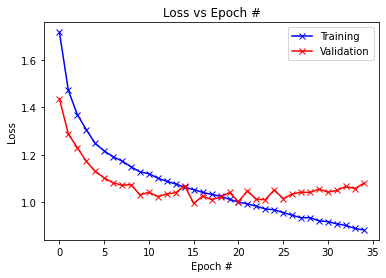

In [50]:
visualize.plot_losses(train_losses, validation_losses)

It seems that the model is overfitting after ~20 epochs

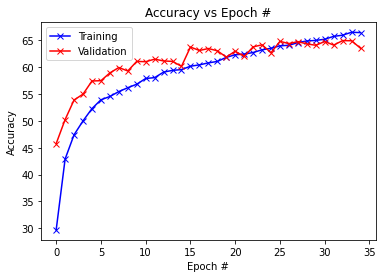

In [51]:
visualize.plot_accuracies(train_accuracies, validation_accuracies)

- Calculate model accuracy on test data
- Display confusion matrix

In [52]:
incorrect_predictions, true_and_predicted_labels = predict_model.calculate_accuracy(pretrained_facial_expression_model)


FINAL RESULTS
Model accuracy on test data: 65.4779%


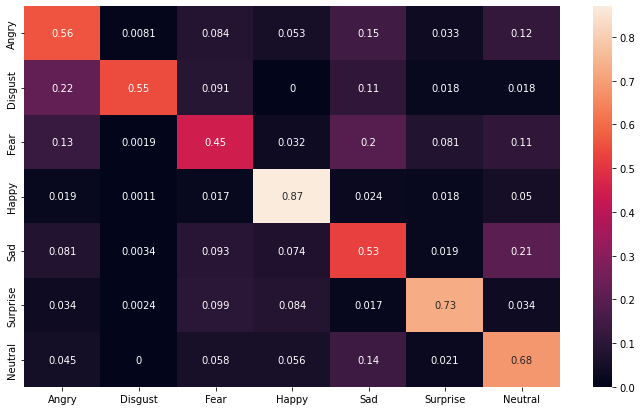

In [53]:
visualize.display_confusion(true_and_predicted_labels)

Confusion Matrix Takeaways

Model performs best classifying happy faces, and worst classifying fearful ones.

Common misclassifications:

Angry mistaken for sad.
Disgust mistaken for angry and sad.
Fear mistaken for angry and sad.
Sad mistaken for neutral and vice versa.


Display incorrect predictions


Prediction: Surprise
Label: Fear


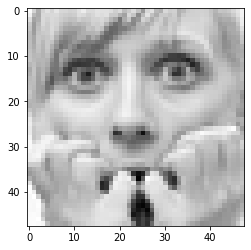

Prediction: Sad
Label: Neutral


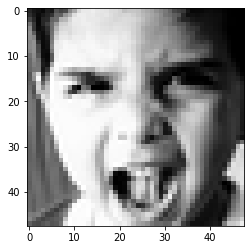

Prediction: Sad
Label: Neutral


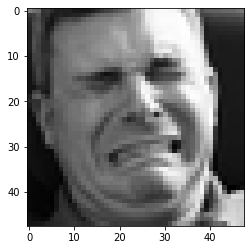

Prediction: Fear
Label: Surprise


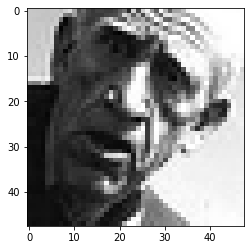

Prediction: Angry
Label: Sad


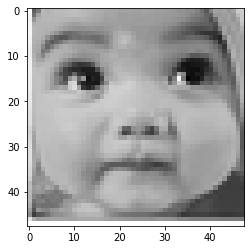

Prediction: Happy
Label: Neutral


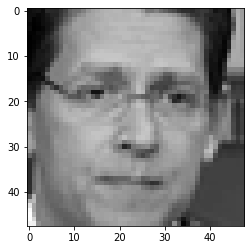

Prediction: Neutral
Label: Angry


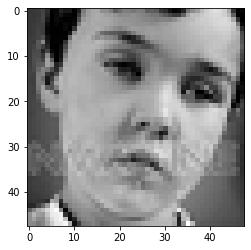

Prediction: Angry
Label: Neutral


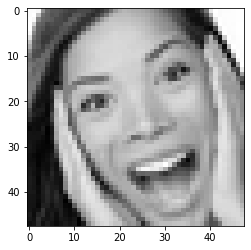

Prediction: Sad
Label: Happy


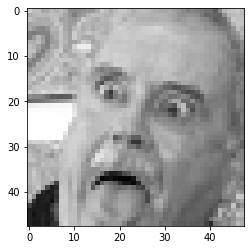

Prediction: Fear
Label: Surprise


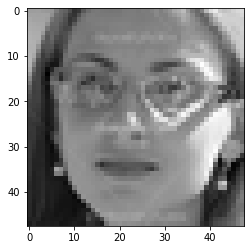

In [ ]:
visualize.display_incorrect(incorrect_predictions)

It seems that some of these images have either been mislabeled or the emotions shown are hard to classify with the human eye.

Personal test

Predict the emotions for some personally uploaded images.

Happy


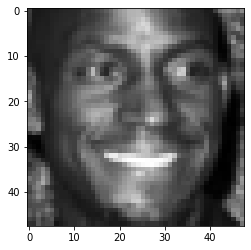

Angry


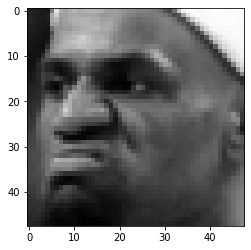

Neutral


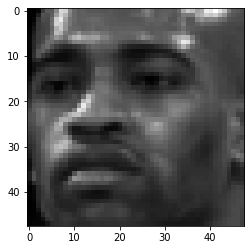

Disgust


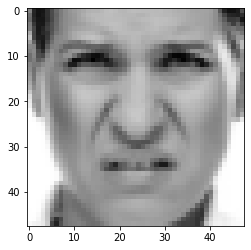

Fear


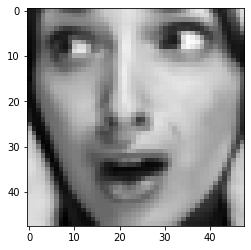

Angry


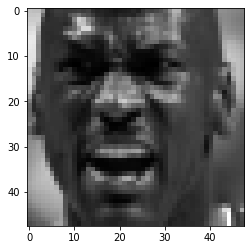

Angry


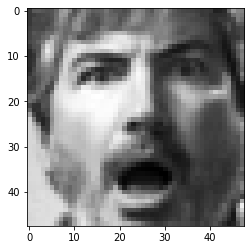

In [ ]:
visualize.display_personal_test(pretrained_facial_expression_model, validationTestDataTransforms)